# Projekt 

## Wiktoria Musialska

Zbiorem danych, który będzie wykorzystany w ramach tego projektu jest zbiór cafe z biblioteki fpp.
Projekt powstał z wykorzystaniem programu R.  

##### Opis zbioru danych: 

Całkowite kwartalne wydatki na kawiarnie, restauracje i usługi gastronomiczne na wynos w Australii (1982:Q2-2010:Q4)

## Załadowanie potrzebnych bibliotek

In [1]:
library(fpp)
library(forecast)

Warning message:
"package 'fpp' was built under R version 3.6.3"Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Warning message:
"package 'fma' was built under R version 3.6.3"Loading required package: expsmooth
Warning message:
"package 'expsmooth' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: tseries
Warning message:
"package 'tseries' was

## Wczytywanie zbioru danych

In [2]:
data(cafe)

## Sprawdzenie występowania braków danych

In [3]:
sum(is.na(cafe))

[1] 0

W danych nie występują braki danych.

## Wyświetlenie zawartości zbioru danych

In [4]:
print(cafe)

       Qtr1   Qtr2   Qtr3   Qtr4
1982        1013.2 1011.9 1166.2
1983 1082.5 1058.7 1118.1 1223.7
1984 1163.7 1178.8 1196.7 1349.1
1985 1233.5 1272.8 1369.7 1563.1
1986 1437.5 1512.8 1602.1 1797.4
1987 1640.3 1665.5 1775.0 1985.0
1988 1816.4 1877.9 1975.1 2114.9
1989 2106.7 2125.6 2253.7 2543.9
1990 2462.2 2412.5 2455.4 2630.2
1991 2446.1 2419.3 2564.9 2941.0
1992 2735.9 2729.9 2680.9 2913.3
1993 2625.7 2541.8 2654.1 2993.7
1994 2901.3 2815.3 3071.5 3320.3
1995 3156.8 3196.1 3330.2 3675.5
1996 3521.1 3424.0 3388.7 3502.4
1997 3387.6 3425.1 3492.0 3695.2
1998 3377.0 3339.1 3456.5 3769.6
1999 3613.8 3715.4 3714.1 4088.0
2000 3828.7 3809.3 4079.1 4415.7
2001 4330.0 4285.0 4419.2 4582.8
2002 4290.8 4367.2 4574.0 4862.5
2003 4616.4 4800.7 5146.6 5765.1
2004 5533.8 5478.4 5649.8 5796.3
2005 5240.2 5366.8 5528.2 6095.9
2006 5647.7 5915.2 6101.1 6520.0
2007 6228.0 6413.3 6615.8 7003.0
2008 6409.6 6414.8 6500.8 7024.6
2009 6691.0 6991.6 7291.9 8068.0
2010 7450.7 7608.3 8316.8 8426.5


Okres czasu zarejestowanego w zbiorze danym zgadza się z opisem.

Dane zaczynają się pojawiać od 2-ego kwartału 1982 roku, a kończą się w 4-tym kwartale 2010 roku.

## Wykres szeregu czasowego

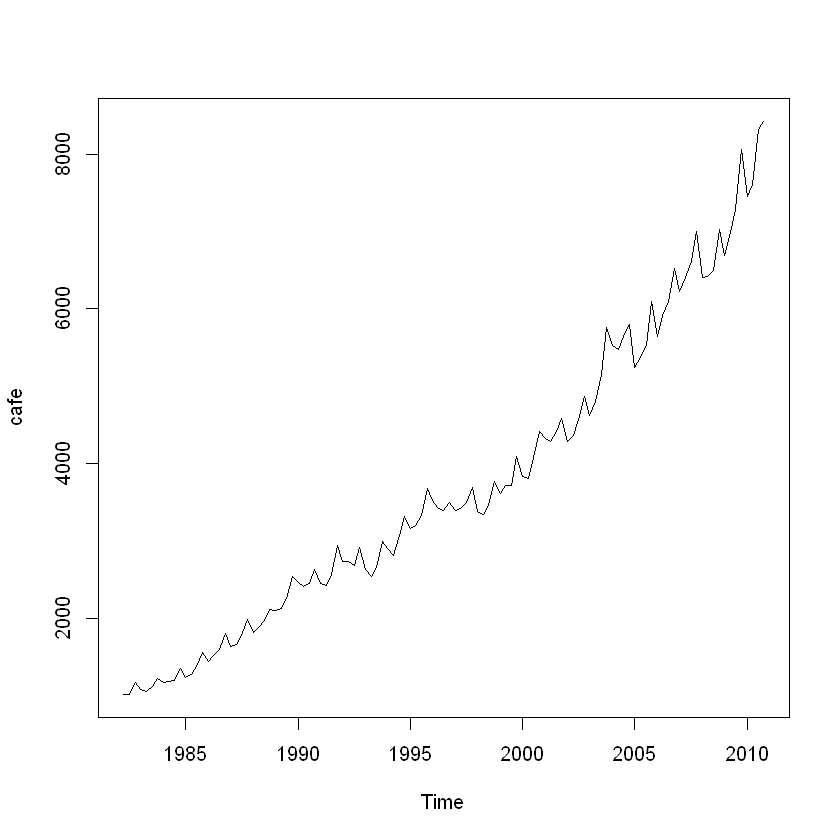

In [5]:
plot(cafe)

Na rysunku widzimy trend zwyżkowy. 

Wartości szeregu czasowego rosną wraz z kolejnymi
latami. 

Brak widocznej sezonowości szeregu.

## Sprawdzenie czy dane są klasy ts

In [6]:
is.ts(cafe)

[1] TRUE

Dane są klasy ts, czyli czy są w podstawowej strukturze do reprezentacji szeregów czasowych w programie R.

In [7]:
start(cafe)
end(cafe)

[1] 1982    2

[1] 2010    4

Przy użyciu metody start i end potwierdziliśmy, że dane zaczynają się w 1982 roku, a kończą się w 2010 roku.

In [8]:
tsp(cafe)

[1] 1982.25 2010.75    4.00

Częstotliwość naszych danych jest kwartalna.

## Wykresy sezonowe

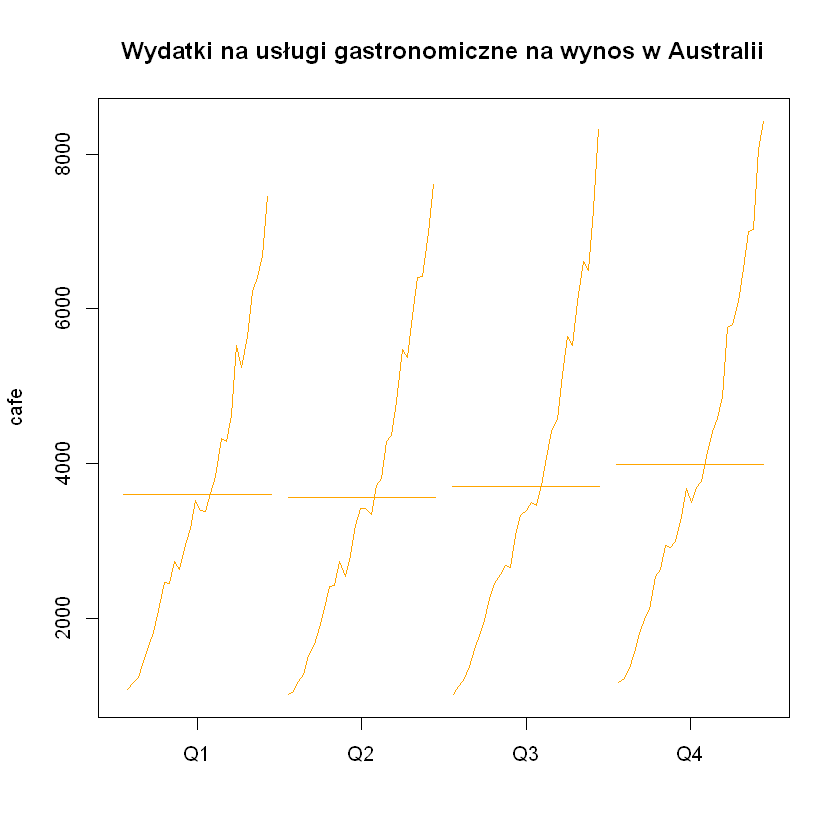

In [9]:
monthplot(cafe, main="Wydatki na usługi gastronomiczne na wynos w Australii", col="orange")

Na wykresie widać, że średnie kwartalne wydatki na usługi gastronomiczne w Australii są do siebie zbliżone. 

Najniższa średnia wydatków jest obserwowana w 2-gim kwartale, a najwyższa w 4-tym kwartale.

Porównując ten wykres z wykresem szeregu czasowego można potwierdzić przypuszczenia o braku sezonowości szeregu. 

Występuje natomiast trend wzrostowy.

In [10]:
mean(cafe)

[1] 3715.793

Średnia kwartalna wydatków na zakupy wynos wynosi 3715.8 zł.

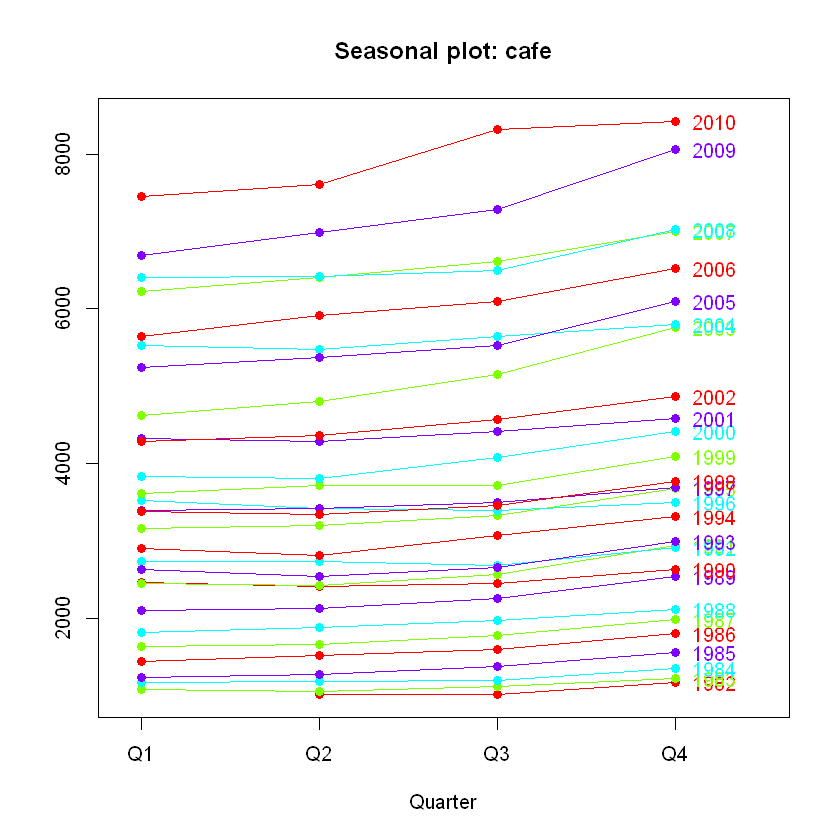

In [11]:
seasonplot(cafe, col=rainbow(4), year.labels=TRUE, pch=19)

Na wykresie szeregu czasowego w rozbiciu na kwartały widać po raz kolejny, że w danych nie występuje współczynnik sezonowy. 

Od 1982 roku do 1998 roku średnie kwartalne są do siebie zbliżone. 

Od 1999 roku widoczny jest delikatny wzrost średniej kwartalnej od 1-ego kwartału do 4-tego kwartału. $\newline$

Podsumowując, średnie wartości wydatków zakupów na wynos w większości lat delikatnie wzrastają wraz z kolejnymi kwartałami, jednak nie jest to zachowanie na tyle widocznie zauważalne, tak jak powinno mieć to miejsce w sezonowości, dlatego też można stwierdzić, że szereg ten nie jest sezonowy.

## Czy i w jakim stopniu wcześniejsze obserwacje mają wpływ na aktualną wartość $\newline$ szeregu (czy występuję i jak silna jest korelacja w danych)?

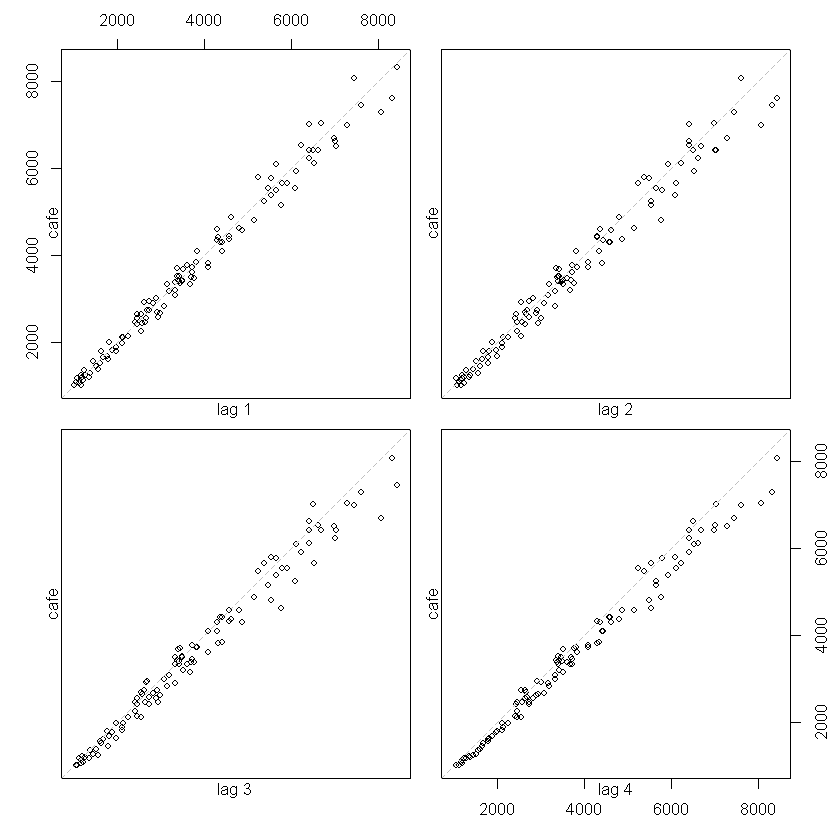

In [12]:
lag.plot(cafe,lags=4,do.lines=FALSE)

Ponieważ częstotliwość szeregu wynosi 4, w funkcji lag.plot() narysowane zostały wykresy rozrzutu wartości szeregu czasowego przesuniętego o pewną liczbę h (opóźnień) wstecz i aktualnej wartości szeregu czasowego (t - czas).  

Widzimy, że dla wszystkich 4-ech opóźnień występuje silna zależność.

Korelacje występujące w szeregu możemy wytłumaczyć występującym w danych trendem.

## Wykresy ACF i PACF

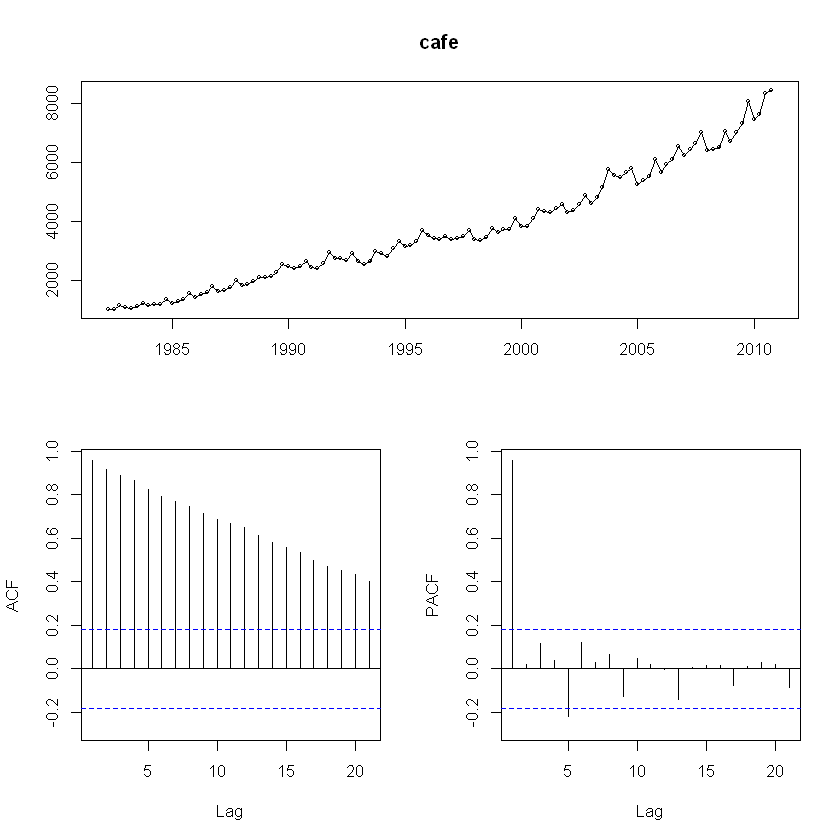

In [13]:
tsdisplay(cafe)

Dodatnie i powoli zanikające wartości ACF sugerują, że dane zawierają trend. 

Wartości PACF 1 i 5 są istotne statystycznie, a pozostałe opóźnienia nie są istotne statystycznie (znajdują się między liniami przerywanymi).

Silny trend potwierdza także duża (bliska 1) wartość PACF(1).

## Dekompozycja szeregu czasowego - ruchoma średnia

Dekompozycja addytywna będzie
odpowiednia w przypadku, gdy wielkość (amplituda) wahań
sezonowych lub wariancja danych wokół trendu nie zmienia się w
dużym stopniu wraz z poziomem szeregu. 

Jeżeli zaś obserwujemy,
że amplituda wahań sezonowych lub wariancja danych wydaje się
proporcjonalna do poziomu szeregu, bardziej odpowiedni będzie
model multiplikatywny.

#### dekompozycja multiplikatywna

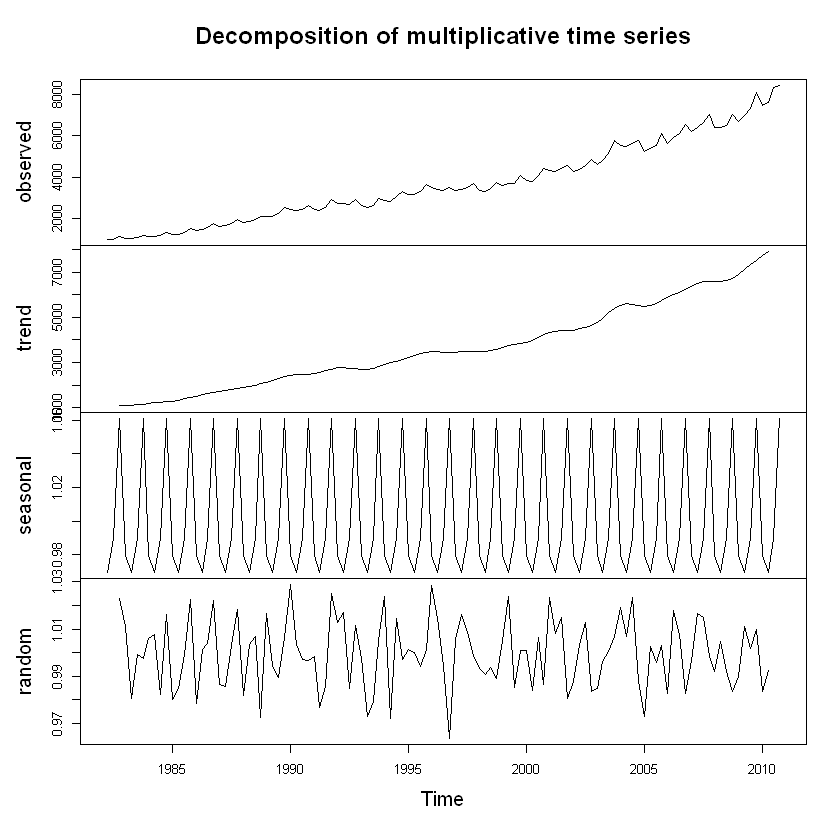

In [14]:
cafe.de.mu=decompose(cafe,type="multiplicative")
plot(cafe.de.mu)

#### dekompozycja addytywna

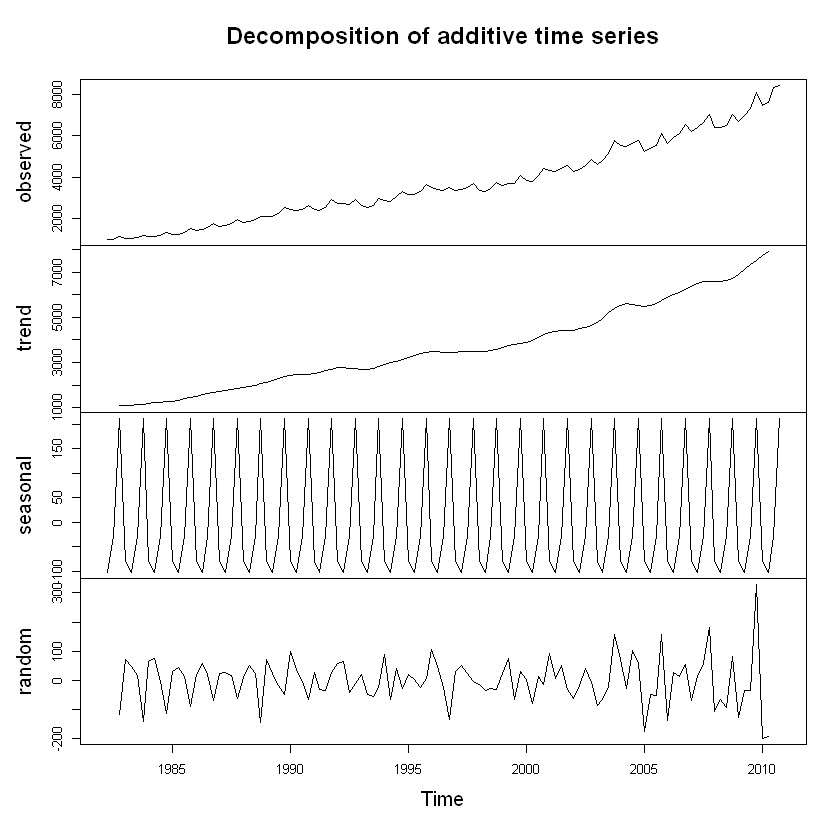

In [15]:
cafe.de.mu=decompose(cafe,type="additive")
plot(cafe.de.mu)

Przyglądając się zachowaniu reszt widzimy, że w przypadku dekompozycji
multiplikatywnej wariancja reszt wydaje się bardziej jednorodna,
niż w przypadku dekompozycji addytywnej.

## Dekompozycja - użycie modelu regresji

#### uwzględnienie tylko trendu

In [16]:
cafe.tlsm.trend=tslm(cafe∼trend)

In [17]:
summary(cafe.tlsm.trend)


Call:
tslm(formula = cafe ~ trend)

Residuals:
   Min     1Q Median     3Q    Max 
-772.8 -312.5   43.6  226.9 1485.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  433.469     80.899   5.358 4.49e-07 ***
trend         56.592      1.211  46.749  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 430.9 on 113 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9504 
F-statistic:  2185 on 1 and 113 DF,  p-value: < 2.2e-16


Estymator trendu liniowego wynosi: m_t =433.469+56.592t,

współczynniki są istotne statystycznie,

 R^2 = 0.9508. Jest to bardzo dobry wynik.

Sprawdźmy jak sytuacja prezentuje się na wykresie.

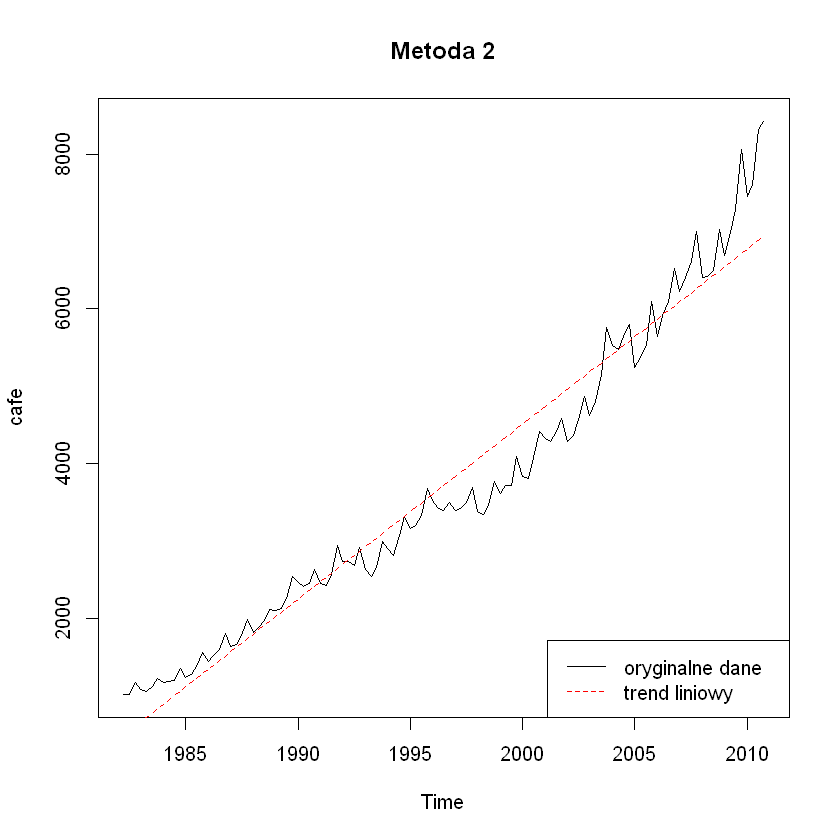

In [18]:
plot(cafe,main="Metoda 2")
lines(fitted(cafe.tlsm.trend),col="red",lty=2)
legend("bottomright",legend=c("oryginalne dane","trend liniowy"),col=c("black","red"),lty=c(1,2))

Trend liniowy nie dopasowuje się dobrze do szeregu.

Zobaczmy jak zachowują się reszty.

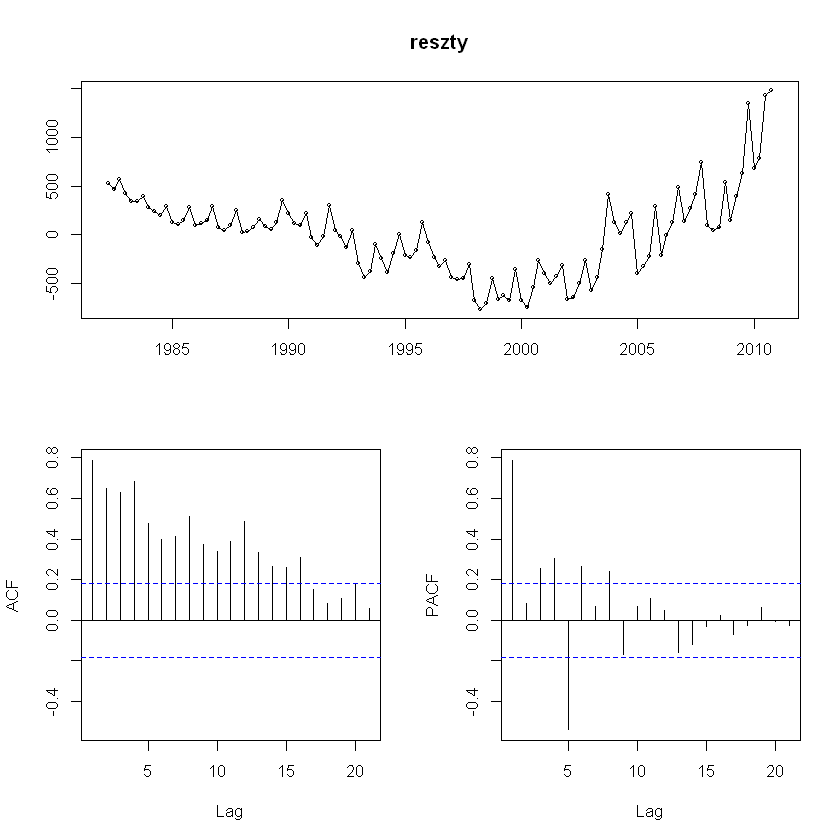

In [19]:
tsdisplay(residuals(cafe.tlsm.trend),main="reszty")

Analizując oba wykresy można mieć
zastrzeżenia co do adekwatności
modelu trendu liniowego dla danych
cafe.

Niezbyt dobre dopasowanie
widać już na wykresie pierwszym.

Ponadto, szereg reszt trudno uznać za losowy.

#### uwzględnienie trendu i współczynnika sezonowego

In [20]:
cafe.tlsm.trend.sez=tslm(cafe∼trend+season)

In [21]:
summary(cafe.tlsm.trend.sez)


Call:
tslm(formula = cafe ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-696.81 -317.40   67.02  204.26 1450.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  328.219    103.484   3.172  0.00196 ** 
trend         56.518      1.165  48.506  < 2e-16 ***
season2        8.006    109.878   0.073  0.94205    
season3       94.919    109.872   0.864  0.38952    
season4      331.470    109.878   3.017  0.00317 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 414.7 on 110 degrees of freedom
Multiple R-squared:  0.9557,	Adjusted R-squared:  0.9541 
F-statistic:   593 on 4 and 110 DF,  p-value: < 2.2e-16


Estymator trendu liniowego wynosi: m_t =328.219 +56.518 t, 

nie wszystkie współczynniki są istotne statystycznie, zmienne season2 oraz season3 nie są istotne statystycznie,

R^2 = 0.9557, delikatnie wzrosło w porównaniu do modelu z samym trendem.

Przyjrzyjmy się teraz wykresowi.

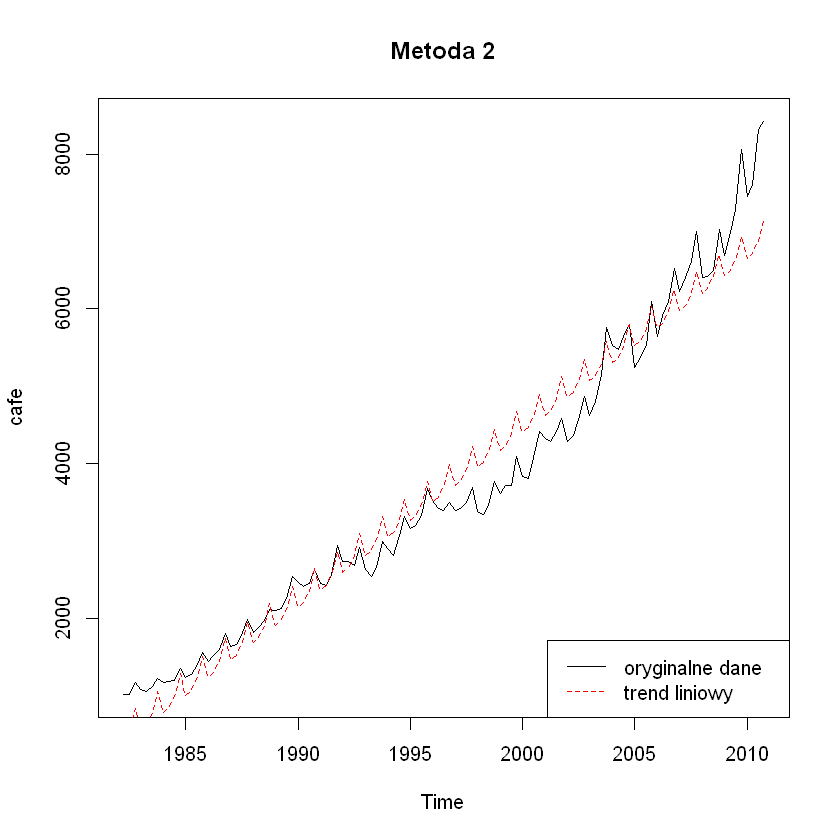

In [22]:
plot(cafe,main="Metoda 2")
lines(fitted(cafe.tlsm.trend.sez),col="red",lty=2)
legend("bottomright",legend=c("oryginalne dane","trend liniowy"),col=c("black","red"),lty=c(1,2))

Trend liniowy nadal nie dopasowuje się dobrze do oryginalnego szeregu.

Spójrzmy jeszcze na reszty.

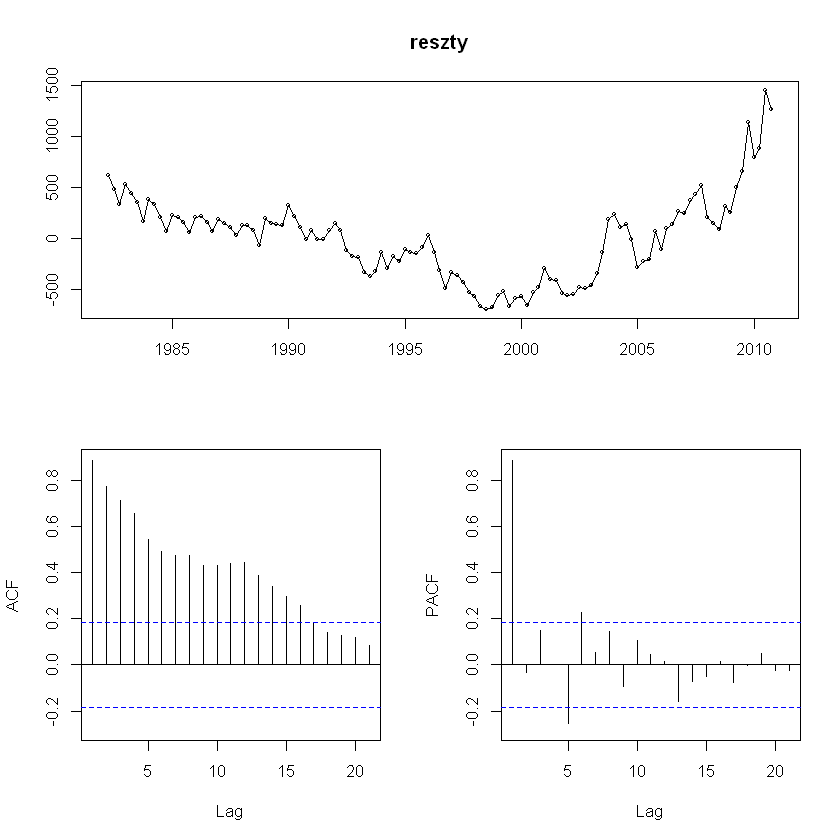

In [23]:
tsdisplay(residuals(cafe.tlsm.trend.sez),main="reszty")

Z wykresów widzimy, że jakość dopasowania modelu poprawiła się.  

Trudno jednak uznać otrzymany model za zadowalający, co widać chociażby z wykresu reszt.

Prawdopodobnie, problem polega na
tym, że jak już zaznaczaliśmy, w szeregu czasowym cafe wariancja
rośnie wraz z poziomem szeregu.

#### przekształcenie Boxa-Coxa ( w szczególności przekształcenie logarytmiczne)

In [24]:
cafe.log.tlsm=tslm(cafe∼trend+season,lambda=0)

In [25]:
summary(cafe.log.tlsm)


Call:
tslm(formula = cafe ~ trend + season, lambda = 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20026 -0.04936 -0.01090  0.05657  0.19236 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.0780570  0.0228126 310.269   <2e-16 ***
trend        0.0168247  0.0002569  65.502   <2e-16 ***
season2     -0.0138792  0.0242223  -0.573   0.5678    
season3      0.0081347  0.0242210   0.336   0.7376    
season4      0.0770694  0.0242223   3.182   0.0019 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09142 on 110 degrees of freedom
Multiple R-squared:  0.9752,	Adjusted R-squared:  0.9743 
F-statistic:  1080 on 4 and 110 DF,  p-value: < 2.2e-16


Estymator trendu liniowego wynosi: m_t =7.0780570 +0.0168247 t,  

nie wszystkie współczynniki są istotne statystycznie, zmienne season2 oraz season3 nie są istotne statystycznie,

R^2 = 0.9752, delikatnie wzrosło w porównaniu do modeli z samym trendem oraz z trendem i współczynnikiem sezonowym.

Spójrzmy jak sytuacja wygląda na wykresie.

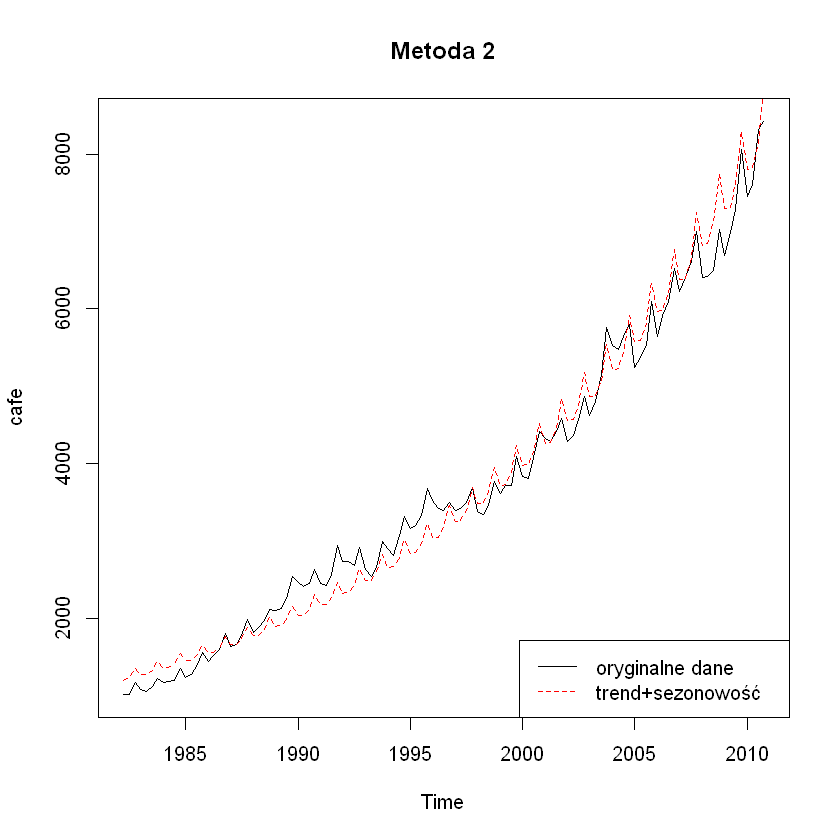

In [26]:
plot(cafe,main="Metoda 2")
lines(fitted(cafe.log.tlsm),col="red",lty=2)
legend("bottomright",legend=c("oryginalne dane","trend+sezonowość"),col=c("black","red"),lty=c(1,2))

Dopasowanie jest nieco lepsze niż ostatnio.

Spójrzmy jeszcze na reszty.

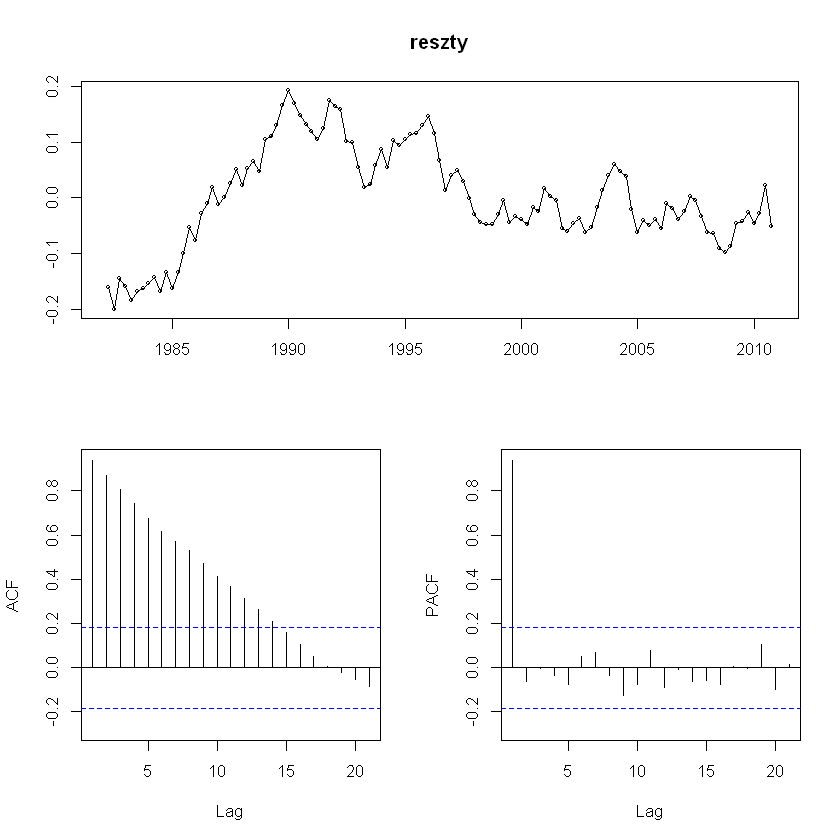

In [27]:
tsdisplay(residuals(cafe.log.tlsm),main="reszty")

Zastosowanie przekształcenia logarytmicznego przed dopasowaniem
modelu addytywnego pozwoliło nam pozbyć się problemów wynikających
z niejednorodności wariancji na końcach analizowanego szeregu.  

Uzyskane reszty trudno jednak uznać za losowe.

Przyjęty model
liniowy dla trendu nie jest więc adekwatny.

Nadzieję na poprawę
dopasowania modelu dekompozycji możemy wiązać z modelem
wielomianowym dla trendu.

#### trend wielomianowy - trend kwadratowy oraz stopnia 4-tego zachowując składową sezonową oraz przekształcenie logarytmiczne

In [28]:
cafe.log.tlsm.2=tslm(cafe∼season+trend+I(trendˆ2),lambda=0)
cafe.log.tlsm.4=tslm(cafe∼season+poly(trend,raw=TRUE,degree=4),lambda=0)

In [29]:
summary(cafe.log.tlsm.2)


Call:
tslm(formula = cafe ~ season + trend + I(trend^2), lambda = 0)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.111141 -0.059620 -0.000395  0.048980  0.170572 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.941e+00  2.314e-02 299.955  < 2e-16 ***
season2     -9.320e-03  1.845e-02  -0.505    0.614    
season3      1.263e-02  1.845e-02   0.685    0.495    
season4      8.163e-02  1.845e-02   4.424 2.30e-05 ***
trend        2.369e-02  7.890e-04  30.029  < 2e-16 ***
I(trend^2)  -5.921e-05  6.590e-06  -8.986 8.75e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06961 on 109 degrees of freedom
Multiple R-squared:  0.9857,	Adjusted R-squared:  0.9851 
F-statistic:  1507 on 5 and 109 DF,  p-value: < 2.2e-16


Estymator trendu liniowego wynosi: m_t =6.941+0.02369t-0.00005921t^2 , 

nie wszystkie współczynniki są istotne statystycznie, zmienne season2 oraz season3 nie są istotne statystycznie,

R^2 = 0.9857, delikatnie wzrosło w porównaniu do poprzednich modeli.

In [30]:
summary(cafe.log.tlsm.4)


Call:
tslm(formula = cafe ~ season + poly(trend, raw = TRUE, degree = 4), 
    lambda = 0)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.092203 -0.032711 -0.004403  0.029709  0.108008 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           6.780e+00  2.474e-02 273.998  < 2e-16 ***
season2                              -6.275e-03  1.249e-02  -0.502  0.61652    
season3                               1.326e-02  1.249e-02   1.061  0.29091    
season4                               7.989e-02  1.249e-02   6.395 4.32e-09 ***
poly(trend, raw = TRUE, degree = 4)1  4.126e-02  2.743e-03  15.041  < 2e-16 ***
poly(trend, raw = TRUE, degree = 4)2 -4.952e-04  9.557e-05  -5.182 1.04e-06 ***
poly(trend, raw = TRUE, degree = 4)3  3.525e-06  1.235e-06   2.854  0.00519 ** 
poly(trend, raw = TRUE, degree = 4)4 -7.707e-09  5.284e-09  -1.459  0.14759    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

Estymator trendu liniowego wynosi: m_t =6.780+0.04126t-0.0004952t^2+0.000003525t^3-0.000000007707t^4, 

nie wszystkie współczynniki są istotne statystycznie, zmienne season2 oraz season3 nie są istotne statystycznie, 

R^2 = 0.9936, jest najlepsze sprośród wszystkich sprawdzanych modeli.

Sprawdźmy jak sytuacja będzie się obrazowała na wykresie.

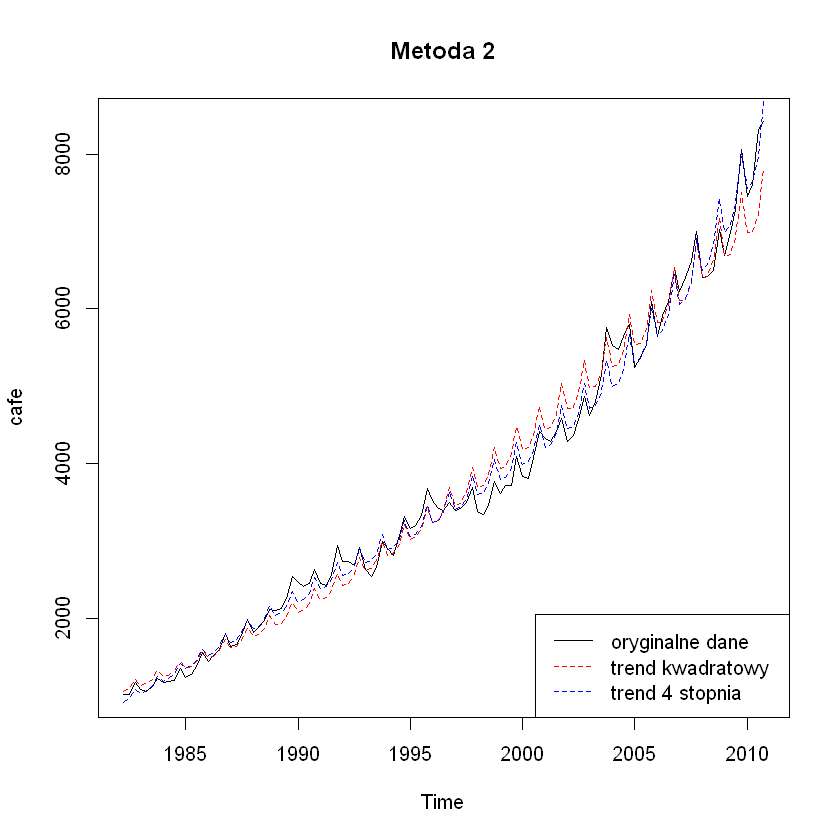

In [31]:
plot(cafe,main="Metoda 2")
lines(fitted(cafe.log.tlsm.2),col="red",lty=2)
lines(fitted(cafe.log.tlsm.4),col="blue",lty=2)
legend("bottomright",legend=c("oryginalne dane","trend kwadratowy","trend 4 stopnia"), col=c("black","red","blue"),lty=c(1,2,2))

Widzimy, że używanie trendu wielomianowego prowadzi do poprawy
jakości dopasowania, zwłaszcza w przypadku wielomianu 4-ego stopnia.

Przyjrzyjmy się jeszcze resztom.

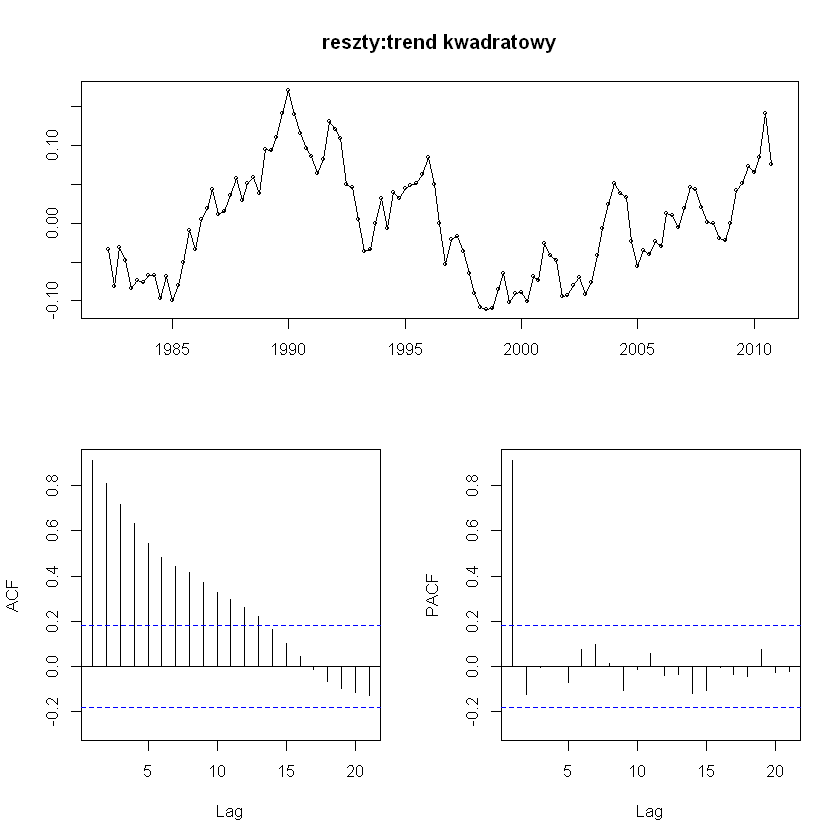

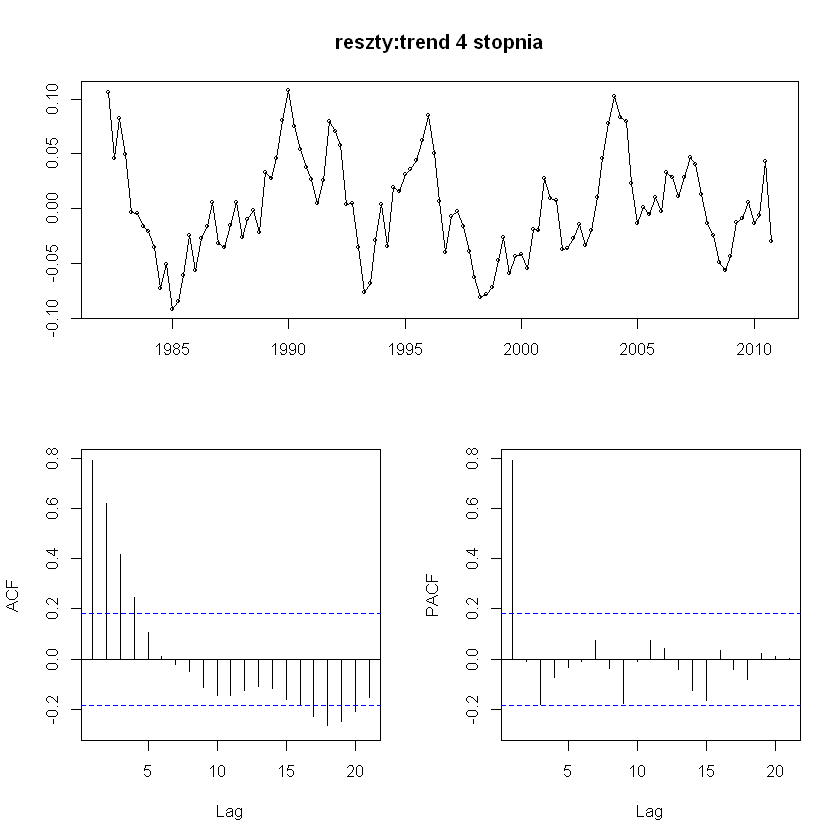

In [32]:
tsdisplay(residuals(cafe.log.tlsm.2),main="reszty:trend kwadratowy")
tsdisplay(residuals(cafe.log.tlsm.4),main="reszty:trend 4 stopnia")

Dla modelu trendu 4 stopnia otrzymujemy bardziej losowe reszty,
które są także bliższe spełnienia założenia o stacjonarności.

#### ocena jakości dopasowania modelu do danych z wykorzystaniem kryteriów informacyjnych AIC i BIC

In [33]:
AIC(cafe.log.tlsm,cafe.log.tlsm.2,cafe.log.tlsm.4)

,df,AIC
cafe.log.tlsm,6,-216.9879
cafe.log.tlsm.2,7,-278.7362
cafe.log.tlsm.4,9,-366.7231


In [34]:
BIC(cafe.log.tlsm,cafe.log.tlsm.2,cafe.log.tlsm.4)

,df,BIC
cafe.log.tlsm,6,-200.5183
cafe.log.tlsm.2,7,-259.5217
cafe.log.tlsm.4,9,-342.0187


Im mniejsza jest wartość tych kryteriów, tym lepsze jest dopasowanie.

Widzimy, że w obu przypadkach model z trendem 4 stopnia
jest najlepszym wyborem.

## Analiza widmowa

#### bez wygładzenia

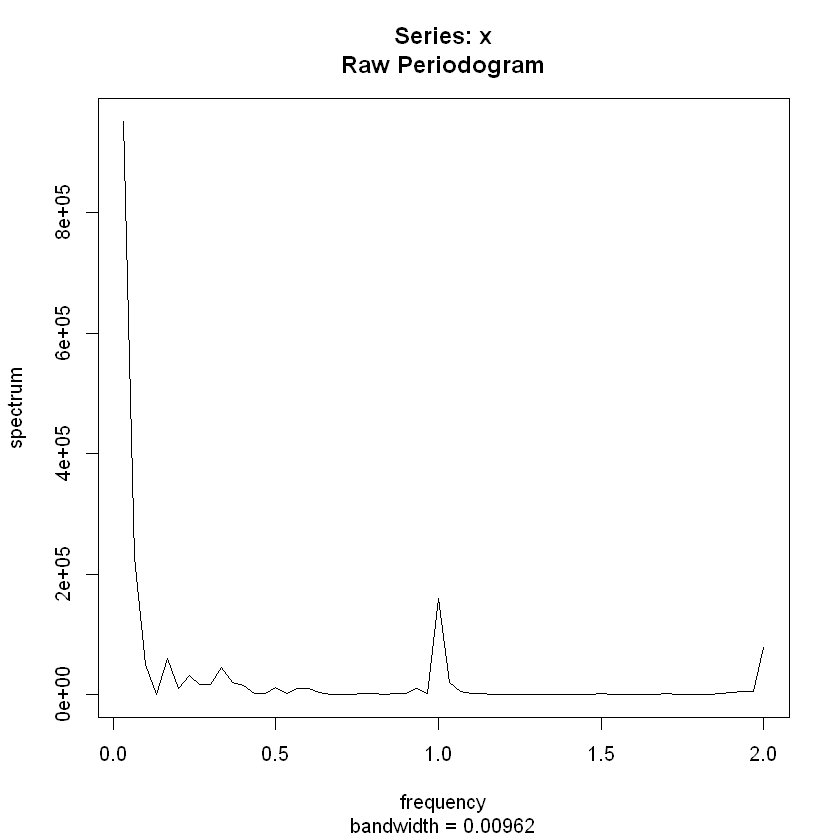

In [35]:
Cafe=spectrum(cafe,log="no")

#### z wygładzeniem

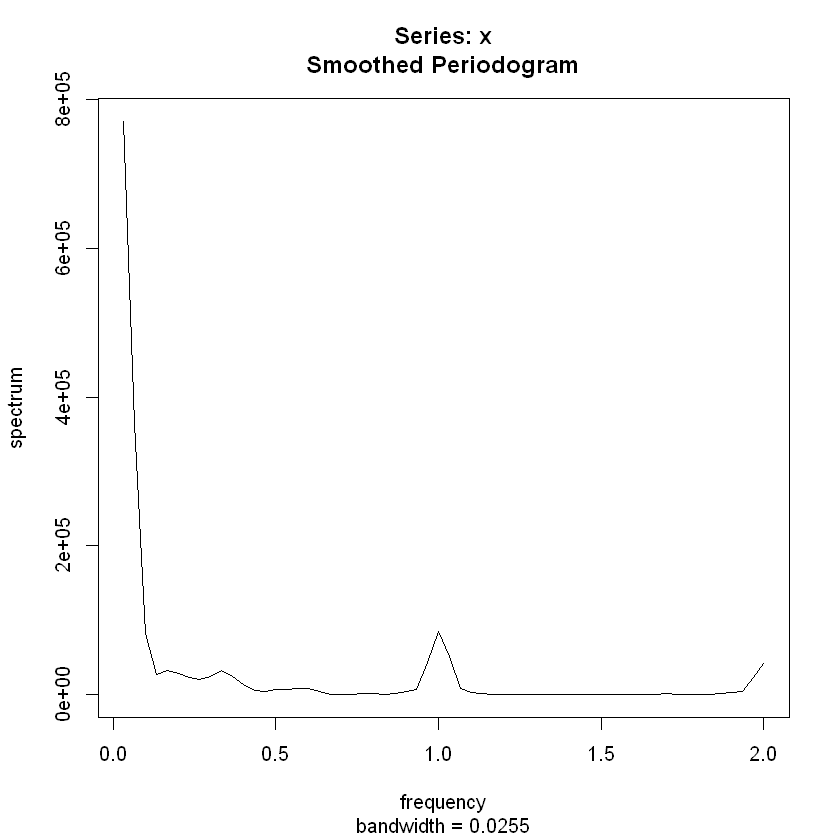

In [36]:
Cafe=spectrum(cafe,log="no", span=3)

Nasz plik jest obiektem klasy ts z zadeklarowaną częstotliwością, dlatego też
wyniki te należy interpretować następująco: mamy
wyraźną okresowość roczną.

#### zmieńmy skalę na osi x, żeby lepiej odczytać częstotliwość 

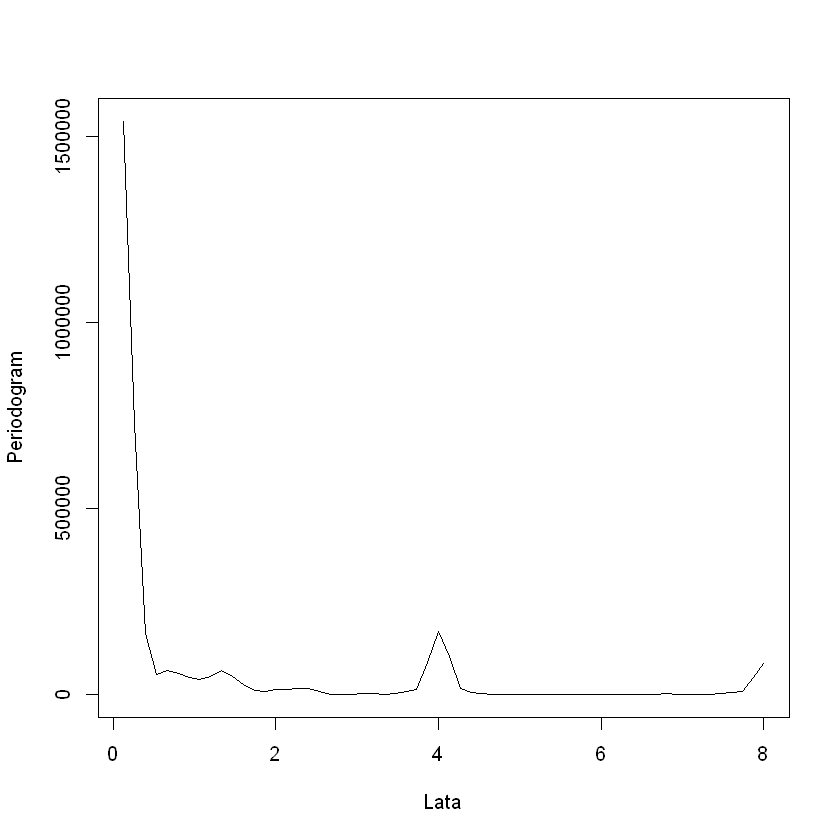

In [37]:
spx=Cafe$freq*4
spy=2*Cafe$spec
plot(spy∼spx,xlab="Lata",ylab="Periodogram",type="l")

Zatem ta najbardziej wyraźna
okresowość odpowiada 4-emu rokowi (1986). 

Pozostałe okresowości już nie są widoczne.

## Dopasowanie modeli z estymacja parametrów

#### metoda Yule’a-Walkera

In [38]:
AR.model.yw=ar(cafe,order.max=1,aic=FALSE)

In [39]:
print(AR.model.yw)


Call:
ar(x = cafe, aic = FALSE, order.max = 1)

Coefficients:
     1  
0.9573  

Order selected 1  sigma^2 estimated as  315642


Dopasowanym modelem jest AR(1).

#### metoda największej wiarygodności

In [40]:
AR.model.mle=ar(cafe,order.max=1,aic=FALSE,method="mle")

In [41]:
print(AR.model.mle)


Call:
ar(x = cafe, aic = FALSE, order.max = 1, method = "mle")

Coefficients:
     1  
0.9975  

Order selected 1  sigma^2 estimated as  60948


Dopasowanym modelem jest ponownie AR(1).

#### automatyczny wybór rzędu AR

In [42]:
AR.optym.aic=ar(cafe,aic=TRUE)

In [43]:
print(AR.optym.aic)


Call:
ar(x = cafe, aic = TRUE)

Coefficients:
     1  
0.9573  

Order selected 1  sigma^2 estimated as  315642


Korzystając z kryterium AIC do wyboru optymalnego rzędu modelu AR widzimy, że p=1 było dobrym wyborem.   

Zasymulowany szereg jest modelem autoregresji rzędu 1.

Również oszacowania parametrów modelu są różne
dopiero od 2-ego miejsca po przecinku w zestawieniu z dwoma wcześniejszymi metodami.

Przyjrzyjmy się poniższemu wykresowi.

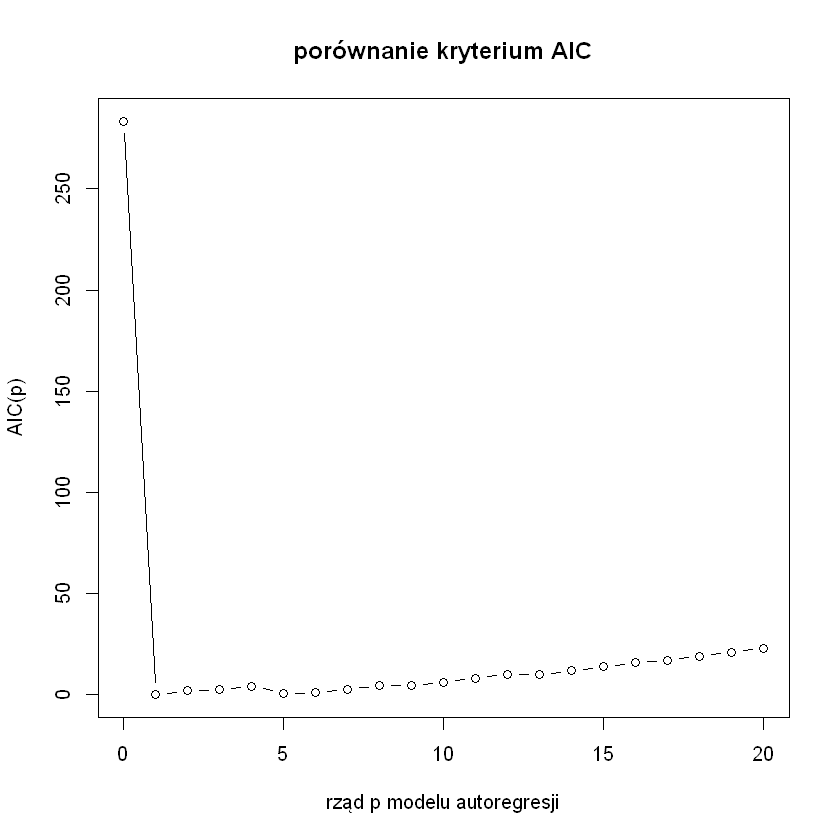

In [44]:
AR.aic=AR.optym.aic$aic
plot(as.numeric(names(AR.aic)),AR.aic,xlab="rząd p modelu autoregresji",ylab="AIC(p)",main="porównanie kryterium AIC", type="b")

Widzimy, że najlepszym wyborem jest rząd 1.

#### wybór optymalnego modelu

## Kryterium informacyjne Akaikego (AIC)

#### Metoda krokowa

In [45]:
arima.opt.AIC=auto.arima(cafe,ic="aic")
arima.opt.AIC

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25

#### Przeszukiwanie zupełne

In [46]:
arima.opt.AICs=auto.arima(cafe,ic="aic", stepwise=FALSE)
arima.opt.AICs

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25

Obie metody doprowadziły do wyboru modelu ARIMA(0,1,0) x (0,1,2) jako modelu optymalnego.

## Skorygowana wersja AIC

#### Metoda krokowa

In [47]:
arima.opt.AICC=auto.arima(cafe,ic="aicc")
arima.opt.AICC

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25

#### Przeszukiwanie zupełne

In [48]:
arima.opt.AICCs=auto.arima(cafe,ic="aicc", stepwise=FALSE)
arima.opt.AICCs

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25

Obie metody potwierdziły, że optymalnym modelem jest model ARIMA(0,1,0) x (0,1,2).

## Bayesowskie kryterium informacyjne BIC

#### Metoda krokowa

In [49]:
arima.opt.BIC=auto.arima(cafe,ic="bic")
arima.opt.BIC

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25

#### Przeszukiwanie zupełne

In [50]:
arima.opt.BICs=auto.arima(cafe,ic="bic", stepwise=FALSE)
arima.opt.BICs

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25

Wszystkie modele dla obu metod potwierdziły, że optymalnym modelem jest model ARIMA(0,1,0) x (0,1,2).

## Wykonanie badań diagnostycznych

Narysujmy teraz wykres wartości resztowych oraz ACF dla
modelu AR(1). 

Skorzystamy z zbudowanego już wcześniej modelu.

In [51]:
ar.reszty=AR.optym.aic$resid

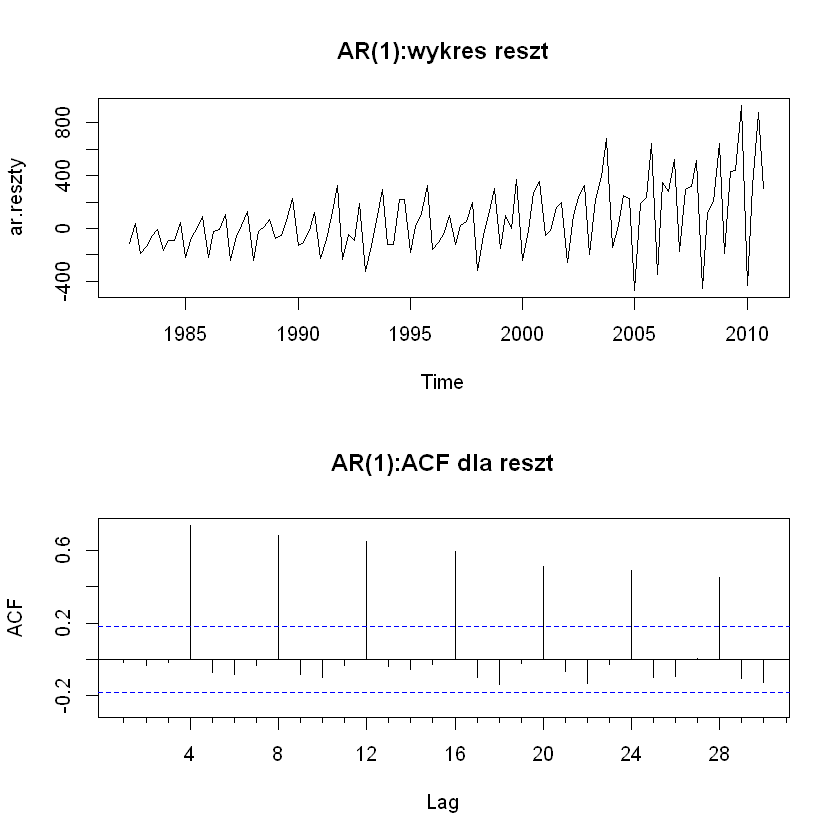

In [52]:
par(mfrow=c(2,1))                 
plot(ar.reszty,main="AR(1):wykres reszt")
Acf(ar.reszty,lag.max=30,main="AR(1):ACF dla reszt")

Wykres dla modelu nie
zawiera żadnych regularnych
wzorców i wygląda na losowy.

Na wykresie ACF jednak widzimy
pojedyncze istotne wartości: dla
modelu AR(1) - dla opóźnienia
4, 8, 12, 16, 20, 24 oraz 28.

Może to świadczyć o pewnych pozostałościach zależności, które nie
zostały wyjaśnione przez dopasowane modele.  

Zbadajmy jeszcze losowość
reszt, wykorzystując test Ljunga-Boxa.

Musimy załadować pakiet, z którego będziemy korzystali.

In [53]:
library(stats)

Zwracamy uwagę na wskaźnik p-value: jeśli jest on nie mniejszy niż 0.05, to
hipotezę o losowości nie odrzucamy (odpowiednią wartość resztową
uznajemy za nieistotną), przy zbyt małej wartości p-value - odrzucamy
hipotezę o losowości. 

H_0 - reszty są losowe,

H_1 - reszty nie są losowe.

In [54]:
Box.test(ar.reszty,lag=4,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 65.527, df = 4, p-value = 1.993e-13


Odrzucamy hipotezę zerową o losowości reszt.

In [55]:
Box.test(ar.reszty,lag=8,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 125.15, df = 8, p-value < 2.2e-16


Odrzucamy hipotezę zerową o losowości reszt.

In [56]:
Box.test(ar.reszty,lag=12,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 182.5, df = 12, p-value < 2.2e-16


Odrzucamy hipotezę zerową o losowości reszt.

In [57]:
Box.test(ar.reszty,lag=16,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 230.91, df = 16, p-value < 2.2e-16


Odrzucamy hipotezę zerową o losowości reszt.

In [58]:
Box.test(ar.reszty,lag=20,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 272.21, df = 20, p-value < 2.2e-16


Odrzucamy hipotezę zerową o losowości reszt.

In [59]:
Box.test(ar.reszty,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 311.17, df = 24, p-value < 2.2e-16


In [60]:
Box.test(ar.reszty,lag=28,type="Ljung-Box")


	Box-Ljung test

data:  ar.reszty
X-squared = 345.02, df = 28, p-value < 2.2e-16


Odrzucamy hipotezę zerową o losowości reszt.

Dla reszt z modelu AR(1) odrzucamy hipotezę o losowości reszt dla opóźnienia  4, 8, 12, 16, 20, 24 oraz 28.

Zbadamy teraz własności reszt dla modelu dopasowanego
do przekształconych danych cafe, czyli modelu
ARIMA(0,1,0) x (0,1,2)_4 dla oryginalnego szeregu. 

Ten model dopasowywaliśmy przy pomocy funkcji auto.arima().

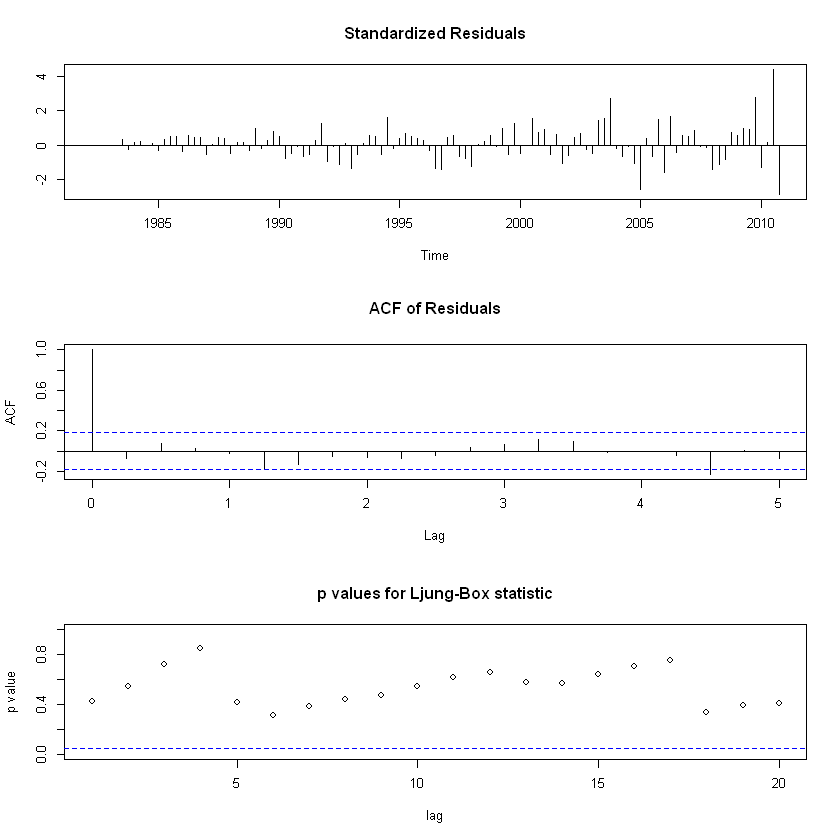

In [61]:
ARIMA.model=Arima(cafe,order=c(0,1,0),seasonal=list(order=c(0,1,2),period=4))  
tsdiag(ARIMA.model,gof.lag=20)

Otrzymaliśmy wykresy: standaryzowanych
reszt (tzn. przeskalowanych, aby wariancja była równa
1), wartości ACF dla reszt oraz p-values dla hipotezy o losowości
reszt testem Ljunga-Boxa. 

W tym przypadku nie mamy zastrzeżeń
co do poprawności dopasowania modelu. 

W szczególności, p-values dla testu
Ljunga-Boxa dla większości naszych
rozważanych opóźnień (4,12,16) są 
większe od poziomu istotności 0.05,
co być może przemawia za przyjęciem hipotezy
o losowości reszt.

Oprócz funkcji tsdiag() do analizy
wartości resztowych można też
wykorzystać dodatkowe narzędzia.

Zastosujmy test Ljunga-Boxa, aby otrzymać
dokładne wartości p-values.

In [62]:
ARIMA.reszty=residuals(ARIMA.model)
Box.test(ARIMA.reszty,lag=4,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 1.3687, df = 4, p-value = 0.8496


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

In [63]:
Box.test(ARIMA.reszty,lag=8,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 7.9472, df = 8, p-value = 0.4386


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

In [64]:
Box.test(ARIMA.reszty,lag=12,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 9.525, df = 12, p-value = 0.6576


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

In [65]:
Box.test(ARIMA.reszty,lag=16,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 12.501, df = 16, p-value = 0.7088


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

In [66]:
Box.test(ARIMA.reszty,lag=20,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 20.858, df = 20, p-value = 0.4055


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

In [67]:
Box.test(ARIMA.reszty,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 26.727, df = 24, p-value = 0.3173


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

In [68]:
Box.test(ARIMA.reszty,lag=28,type="Ljung-Box")


	Box-Ljung test

data:  ARIMA.reszty
X-squared = 29.038, df = 28, p-value = 0.4106


Nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt.

W odróżnieniu od modelu autoregresyjnego tym razem test
Ljunga-Boxa pozwala przyjąć hipotezę o losowości reszt (dla wszystkich
rozważanych opóźnień). Zatem model
ARIMA(0,1,0) x (0,1,2)_4 możemy uznać za lepiej dopasowany niż
model AR(1).

Na koniec sprawdźmy jeszcze, czy można przyjąć założenie o
normalności rozkładu reszt. 

W tym celu narysujmy histogram dla
reszt z ostatniego modelu oraz wykres kwantylowy.

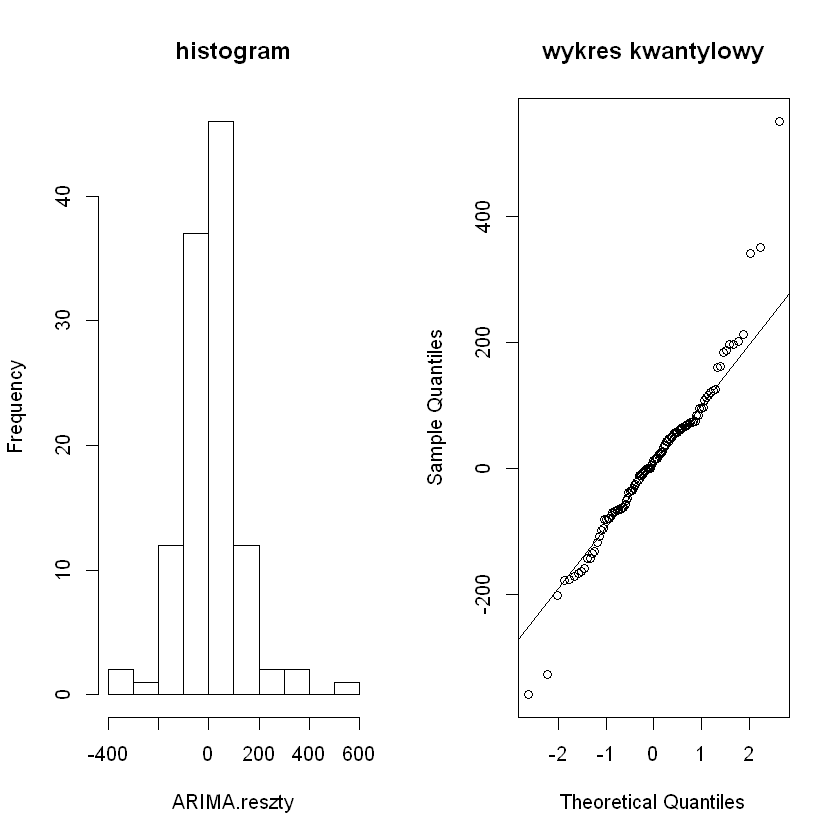

In [69]:
par(mfrow=c(1,2))
hist(ARIMA.reszty,main="histogram")
qqnorm(ARIMA.reszty,main="wykres kwantylowy")
qqline(ARIMA.reszty)

Histogram wartości resztowych
wydaje się bardziej wyostrzony,
niż należy; wykres kwantylowy
również wykazuje pewne odstępstwa
od rozkładu normalnego.

Wykonajmy jeszcze test Shapiro-Wilka na normalność wartości
resztowych.

In [70]:
shapiro.test(ARIMA.reszty)


	Shapiro-Wilk normality test

data:  ARIMA.reszty
W = 0.94271, p-value = 9.365e-05


Test Shapiro-Wilka również wskazuje na odrzucenie hipotezy o
normalności reszt (p-value jest mniejsze niż 0.05). 

Normalność
rozkładu reszt budzi więc wątpliwości.

## Prognozowanie 

konstrukcja prognoz punktowych i przedziałów
predykcyjnych, horyzont prognozy: 24 miesiecy dla danych miesiecznych,
8 kwartałów dla danych kwartalnych, 20 lat dla danych
rocznych

W prognozach uzyskane wyniki to następujące elementy: prognozy punktowe, przedziały predykcyjne na poziomie ufności 0.80 oraz 0.95.

#### Prognozowania za pomocą ruchomej średniej

In [71]:
cafe.forecast.mean=meanf(cafe,h=8)
cafe.forecast.mean

        Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2011 Q1       3715.793 1210.675 6220.911 -134.1177 7565.704
2011 Q2       3715.793 1210.675 6220.911 -134.1177 7565.704
2011 Q3       3715.793 1210.675 6220.911 -134.1177 7565.704
2011 Q4       3715.793 1210.675 6220.911 -134.1177 7565.704
2012 Q1       3715.793 1210.675 6220.911 -134.1177 7565.704
2012 Q2       3715.793 1210.675 6220.911 -134.1177 7565.704
2012 Q3       3715.793 1210.675 6220.911 -134.1177 7565.704
2012 Q4       3715.793 1210.675 6220.911 -134.1177 7565.704

Otrzymaliśmy prognozy dla 8 kwartałów.

Spójrzmy, jak sytuacja wygląda na wykresie.

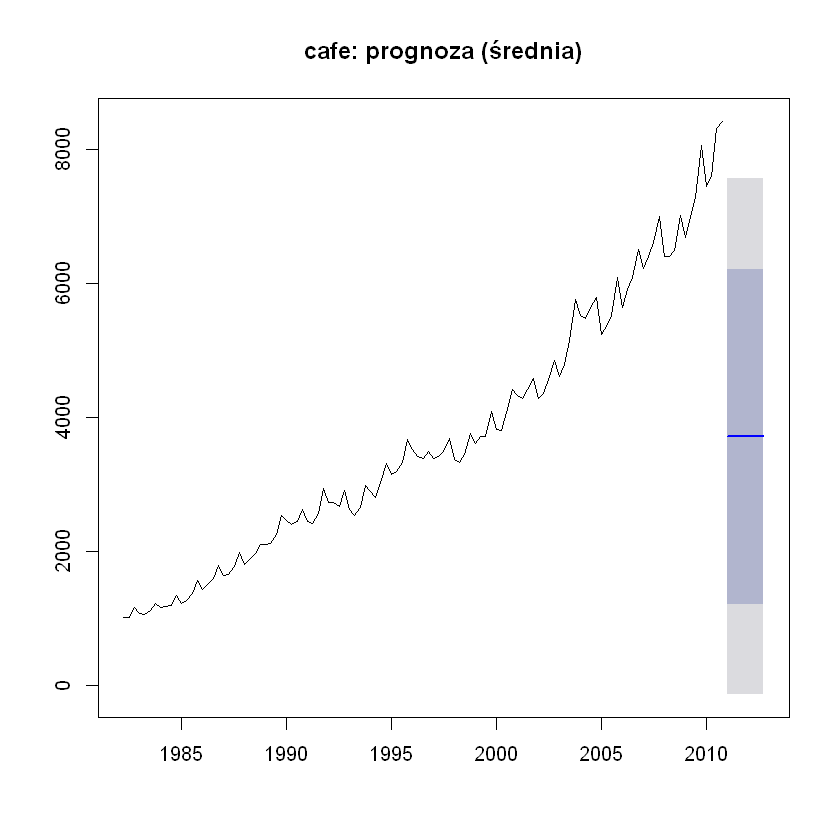

In [72]:
plot(cafe.forecast.mean,main="cafe: prognoza (średnia)")

Jak widzimy, występujący w szeregu czasowym cafe trend spowodował, że prognozy
oparte na średniej nie dały zadowalających rezultatów.

Dla porównania zastosujmy tę samą metodę konstrukcji prognoz, ale z usuniętym trendem. 

Do wyeliminowania
tych możemy wykorzystać
operację różnicowania.

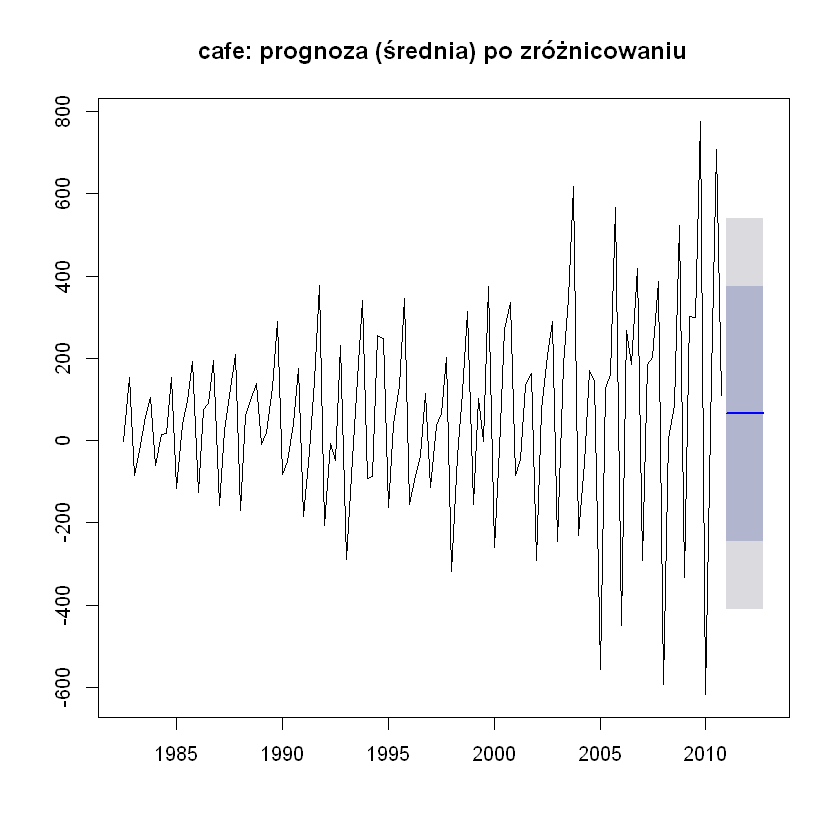

In [73]:
cafe.diff.forecast.mean=meanf(diff(cafe),h=8)
plot(cafe.diff.forecast.mean,main="cafe: prognoza (średnia) po zróżnicowaniu")

Metoda prognozowania oparta na uśrednianiu wcześniejszych wartości radzi sobie dużo
lepiej, choć trudno oczywiście uznać
skonstruowane prognozy za satysfakcjonujące.

#### Konstrukcji prognoz na podstawie metod naiwnych

In [74]:
cafe.forecast.naive=naive(cafe,h=8)
cafe.forecast.naive

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011 Q1         8426.5 8110.055 8742.945 7942.540 8910.460
2011 Q2         8426.5 7978.980 8874.020 7742.077 9110.923
2011 Q3         8426.5 7878.402 8974.598 7588.256 9264.744
2011 Q4         8426.5 7793.611 9059.389 7458.580 9394.420
2012 Q1         8426.5 7718.908 9134.092 7344.332 9508.668
2012 Q2         8426.5 7651.372 9201.628 7241.045 9611.955
2012 Q3         8426.5 7589.266 9263.734 7146.062 9706.938
2012 Q4         8426.5 7531.460 9321.540 7057.654 9795.346

Otrzymaliśmy prognozy dla 8 kwartałów.

Przyjrzyjmy się wykresowi.

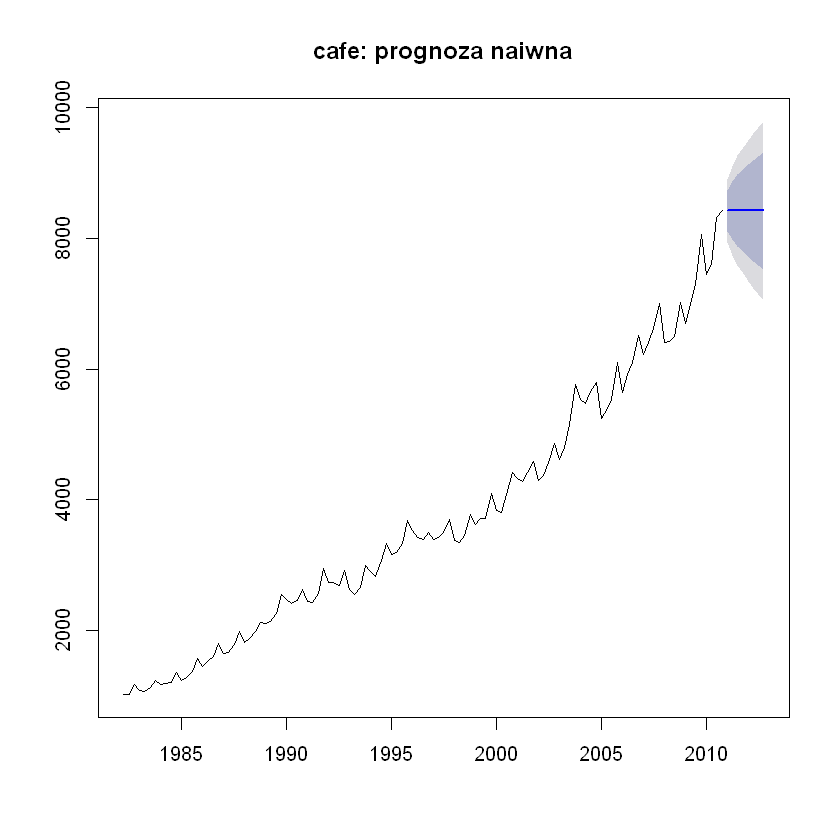

In [75]:
plot(cafe.forecast.naive,main="cafe: prognoza naiwna")

Widzimy, że prognoza prezentuje się
znacznie lepiej, niż ta dla metody
średniej.

Prognoza jest ustabilizowana. Przyszłe wartości się ustabilizowały. Nie widać już w niej trendu wzrostowego.

#### Metoda uwzględniająca dryf

In [76]:
cafe.forecast.rwf=rwf(cafe,drift=TRUE,h=8)
cafe.forecast.rwf

        Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
2011 Q1       8491.529 8184.908 8798.150 8022.592  8960.466
2011 Q2       8556.558 8121.032 8992.084 7890.479  9222.637
2011 Q3       8621.587 8085.865 9157.309 7802.271  9440.903
2011 Q4       8686.616 8065.357 9307.875 7736.482  9636.750
2012 Q1       8751.645 8054.094 9449.196 7684.833  9818.457
2012 Q2       8816.674 8049.314 9584.034 7643.098  9990.249
2012 Q3       8881.703 8049.384 9714.021 7608.781 10154.624
2012 Q4       8946.732 8053.246 9840.217 7580.263 10313.200

Otrzymaliśmy prognozę dla 8 kwartałów.

Spójrzmy na wykres.

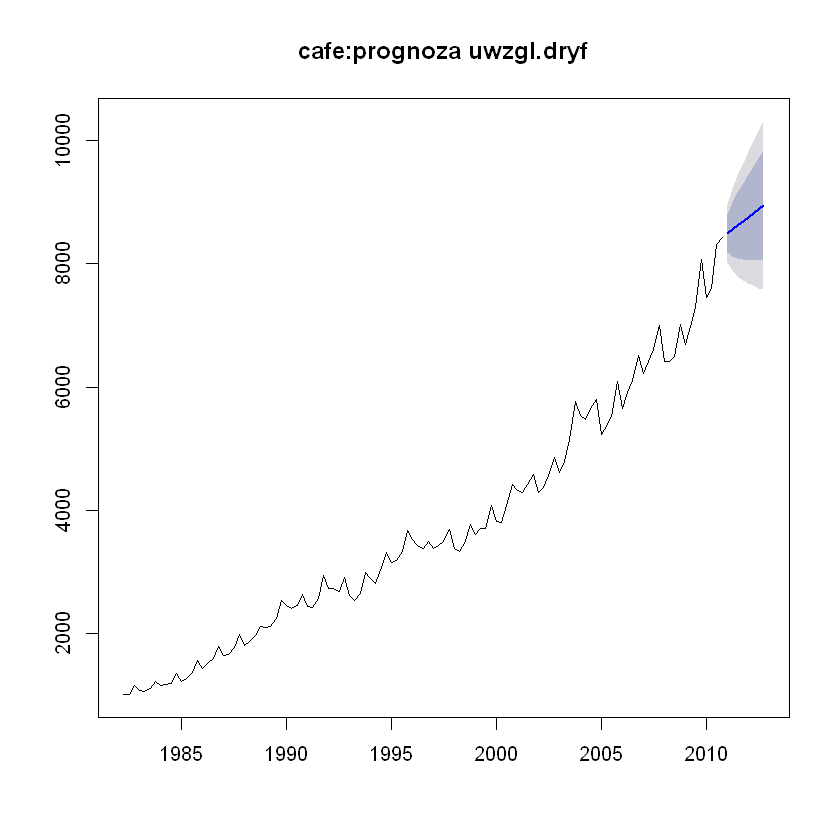

In [77]:
plot(cafe.forecast.rwf,main="cafe:prognoza uwzgl.dryf")

Jak widzimy z wykresów, prognoza w przypadku szeregu cafe
uwzględnia trend i w odróżnieniu od metody naiwnej widoczny jest dalszy wzrost przyszłych wartości.

Metoda uwzględniająca
dryf zakłada, że trend jest liniowy, co może nie dawać przyzwoitych prognoz w przypadku,gdy trend wygląda na
wykładniczy. 

Spróbujmy zatem uwzględnić specyficzny charakter
trendu w szeregu cafe. 

W tym celu prognozę wyznaczymy po zastosowaniu
przekształcenia logarytmicznego Boxa-Coxa z parametrem
λ = 0.

In [78]:
log.cafe.forecast.rwf=rwf(BoxCox(cafe,lambda=0),drift=TRUE,h=8)
log.cafe.forecast.rwf

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011 Q1       9.057718 8.980026 9.135410 8.938899 9.176537
2011 Q2       9.076299 8.965946 9.186653 8.907528 9.245071
2011 Q3       9.094881 8.959139 9.230622 8.887282 9.302479
2011 Q4       9.113462 8.956047 9.270877 8.872717 9.354207
2012 Q1       9.132043 8.955298 9.308789 8.861734 9.402352
2012 Q2       9.150625 8.956191 9.345058 8.853264 9.447985
2012 Q3       9.169206 8.958313 9.380099 8.846673 9.491739
2012 Q4       9.187787 8.961396 9.414179 8.841551 9.534023

Otrzymaliśmy prognozę dla 8 kwartałów.

Narysujmy teraz wykresy i porównajmy je ze sobą.

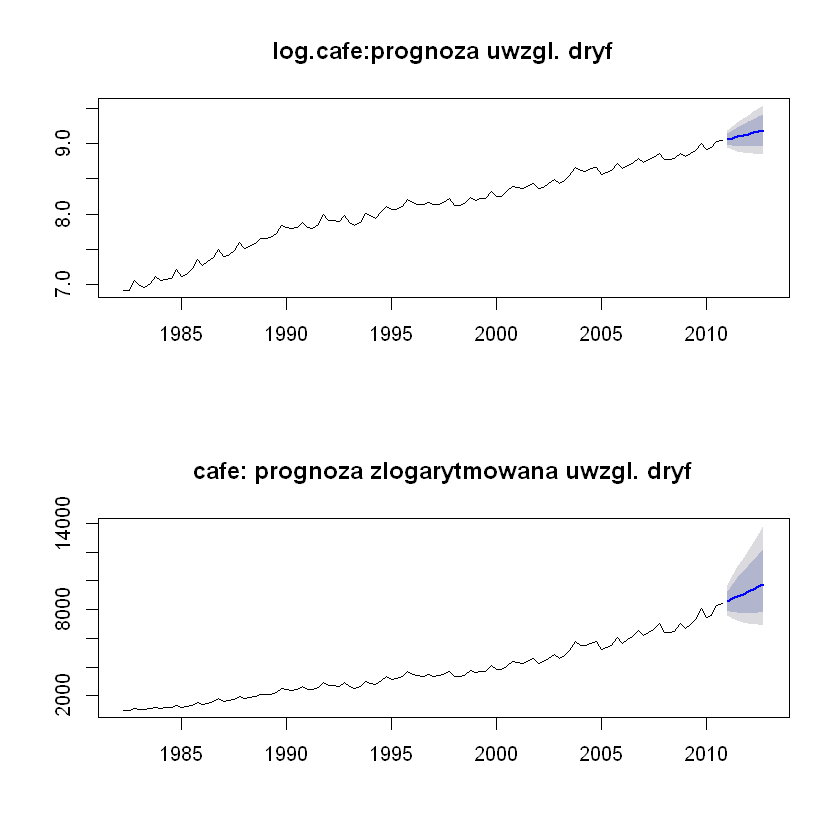

In [79]:
par(mfrow=c(2,1))
plot(log.cafe.forecast.rwf,main="log.cafe:prognoza uwzgl. dryf")
cafe.forecast.log.rwf=rwf(cafe,drift=TRUE,h=8,lambda=0)
plot(cafe.forecast.log.rwf,main="cafe: prognoza zlogarytmowana uwzgl. dryf")

Zastosowanie przekształcenia
logarytmicznego dla szeregu
cafe zmieniło charakter trendu
z wykładniczego na liniowy, co
pozytywnie odbiło się na prognozie. Uwzględnienie przekształcenia logarytmicznego poprawiło także
dokładność prognozy.

## Ocena dokładnosci prognoz 

#### Funkcja accuracy() z pakietu forecast

#### Metody opartej na średniej

In [80]:
accuracy(cafe.forecast.mean)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.246705e-13,1926.599,1590.127,-37.04065,62.31865,5.785939,0.9573093


In [81]:
accuracy(cafe.diff.forecast.mean)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.194874e-14,238.2062,178.9239,179.6932,222.1102,1.468559,-0.2360275


#### Metoda naiwna

In [82]:
accuracy(cafe.forecast.naive)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,65.02895,246.923,188.7009,1.661601,5.202148,0.6866191,-0.2360275


#### Metody uwzględniająca dryf

In [83]:
accuracy(cafe.forecast.rwf)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.346154e-13,238.2062,178.9239,-0.7014427,5.049823,0.6510441,-0.2360275


In [84]:
accuracy(log.cafe.forecast.rwf)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,3.505946e-16,0.06035675,0.04941041,-1.555788e-05,0.6194945,0.6229117,-0.2425265


In [85]:
accuracy(cafe.forecast.log.rwf)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.88577,237.9052,175.1736,-0.1827355,4.956041,0.6373981,-0.2625614


Widzimy, że kryteria RMSE, MAE, MAPE, MASE wskazują na
metodę uwzględniającą dryf (w tym metodę poszerzoną o przekształcenie logarytmiczne Boxa-Coxa z parametrem λ = 0) jako najlepszą spośród
trzech metod.

#### Przedziały predykcyjne dla różnych poziomów ufności

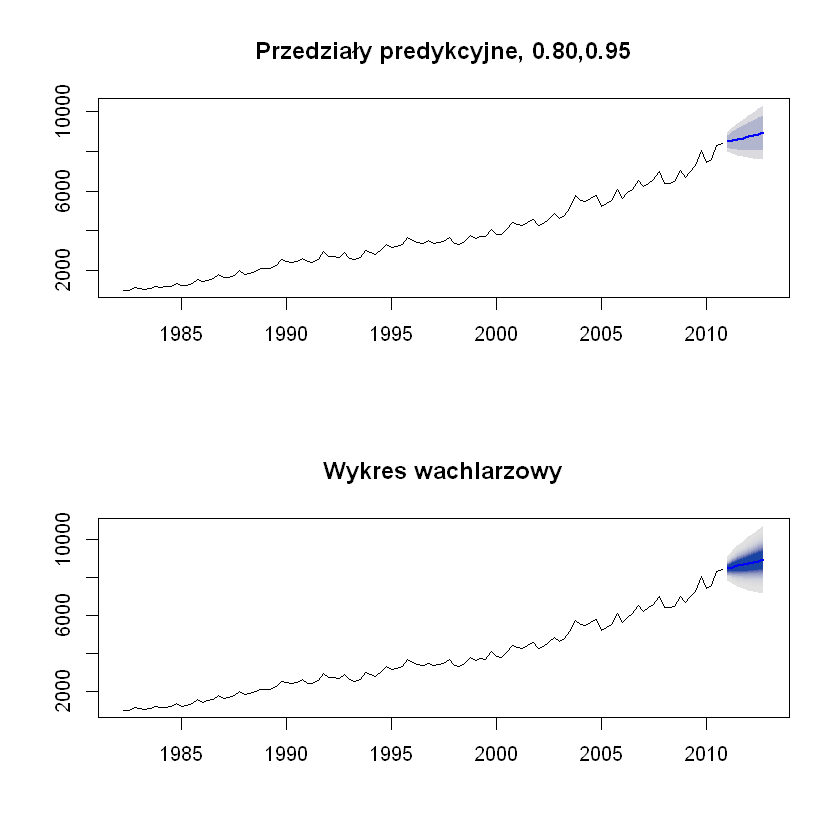

In [86]:
par(mfrow=c(2,1))
cafe.forecast.rwf.1=rwf(cafe,drift=TRUE,level=c(0.8,0.95),h=8)
plot(cafe.forecast.rwf.1,main="Przedziały predykcyjne, 0.80,0.95")
cafe.forecast.rwf.2=rwf(cafe,drift=TRUE,fan=TRUE,h=8)
plot(cafe.forecast.rwf.2,main="Wykres wachlarzowy")

Na rysunkach po kolei zostały przedstawione
prognozy z dwoma przedziałami
predykcyjnymi na poziomach
ufności 0.80, 0.95 oraz tzw.
wykres wachlarzowy, na którym przedstawiono zostało kilka przedziałów predykcyjnych.

Co prawda,
wykresy nie są zbyt czytelne i ciężko jest zauważyć różnicę pomiędzy
nimi.

Ocena dokładności prognoz na podstawie tych samych danych,
które były wykorzystane do konstrukcji prognoz, nie pozwala na w
pełni wiarygodną ocenę skuteczności prognoz i może prowadzić do
błędnych wniosków.

#### Podział danych na zbiór uczący i testowy w celu zwiększenia wiarygodności 

Zbiór uczący wygląda następująco:

In [87]:
cafe.train=window(cafe,end=c(2004,4))
print(cafe.train)

       Qtr1   Qtr2   Qtr3   Qtr4
1982        1013.2 1011.9 1166.2
1983 1082.5 1058.7 1118.1 1223.7
1984 1163.7 1178.8 1196.7 1349.1
1985 1233.5 1272.8 1369.7 1563.1
1986 1437.5 1512.8 1602.1 1797.4
1987 1640.3 1665.5 1775.0 1985.0
1988 1816.4 1877.9 1975.1 2114.9
1989 2106.7 2125.6 2253.7 2543.9
1990 2462.2 2412.5 2455.4 2630.2
1991 2446.1 2419.3 2564.9 2941.0
1992 2735.9 2729.9 2680.9 2913.3
1993 2625.7 2541.8 2654.1 2993.7
1994 2901.3 2815.3 3071.5 3320.3
1995 3156.8 3196.1 3330.2 3675.5
1996 3521.1 3424.0 3388.7 3502.4
1997 3387.6 3425.1 3492.0 3695.2
1998 3377.0 3339.1 3456.5 3769.6
1999 3613.8 3715.4 3714.1 4088.0
2000 3828.7 3809.3 4079.1 4415.7
2001 4330.0 4285.0 4419.2 4582.8
2002 4290.8 4367.2 4574.0 4862.5
2003 4616.4 4800.7 5146.6 5765.1
2004 5533.8 5478.4 5649.8 5796.3


Natomiast zbiór testowy, wygląda tak:

In [88]:
cafe.test=window(cafe,start=c(2005,1))
print(cafe.test)

       Qtr1   Qtr2   Qtr3   Qtr4
2005 5240.2 5366.8 5528.2 6095.9
2006 5647.7 5915.2 6101.1 6520.0
2007 6228.0 6413.3 6615.8 7003.0
2008 6409.6 6414.8 6500.8 7024.6
2009 6691.0 6991.6 7291.9 8068.0
2010 7450.7 7608.3 8316.8 8426.5


Wyznaczamy prognozy na podstawie zbioru uczącego, wykorzystując cztery stosowane poprzednio
proste metody prognozowania. 

Będziemy widzieć tu po kolei: prognozy punktowe, przedziały predykcyjne na poziomie ufności 0.80 oraz 0.95.

#### Prognoza oparta na ruchomej średniej

In [89]:
f1_1=meanf(cafe.train,h=8)
f1_1

        Point Forecast   Lo 80    Hi 80    Lo 95    Hi 95
2005 Q1       2938.971 1285.65 4592.293 394.7898 5483.153
2005 Q2       2938.971 1285.65 4592.293 394.7898 5483.153
2005 Q3       2938.971 1285.65 4592.293 394.7898 5483.153
2005 Q4       2938.971 1285.65 4592.293 394.7898 5483.153
2006 Q1       2938.971 1285.65 4592.293 394.7898 5483.153
2006 Q2       2938.971 1285.65 4592.293 394.7898 5483.153
2006 Q3       2938.971 1285.65 4592.293 394.7898 5483.153
2006 Q4       2938.971 1285.65 4592.293 394.7898 5483.153

#### Prognoza oparta o metody naiwne

In [90]:
f2_1=naive(cafe.train,h=8)
f2_1

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005 Q1         5796.3 5560.918 6031.682 5436.315 6156.285
2005 Q2         5796.3 5463.420 6129.180 5287.204 6305.396
2005 Q3         5796.3 5388.607 6203.993 5172.787 6419.813
2005 Q4         5796.3 5325.536 6267.064 5076.329 6516.271
2006 Q1         5796.3 5269.970 6322.630 4991.348 6601.252
2006 Q2         5796.3 5219.735 6372.865 4914.520 6678.080
2006 Q3         5796.3 5173.538 6419.062 4843.868 6748.732
2006 Q4         5796.3 5130.540 6462.060 4778.108 6814.492

#### Prognoza oparta o dryft

In [91]:
f3_1=rwf(cafe.train,drift=TRUE,h=8)
f3_1

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005 Q1       5849.446 5622.871 6076.020 5502.929 6195.962
2005 Q2       5902.591 5580.391 6224.792 5409.828 6395.354
2005 Q3       5955.737 5558.961 6352.512 5348.921 6562.553
2005 Q4       6008.882 5548.242 6469.523 5304.394 6713.371
2006 Q1       6062.028 5544.255 6579.801 5270.162 6853.893
2006 Q2       6115.173 5544.972 6685.374 5243.126 6987.220
2006 Q3       6168.319 5549.198 6787.439 5221.456 7115.182
2006 Q4       6221.464 5556.159 6886.770 5203.967 7238.962

#### Prognoza oparta o dryft z przekształceniem Boxa-Coxa

In [92]:
f4_1=rwf(cafe.train,drift=TRUE,lambda=0,h=8)
f4_1

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005 Q1       5909.722 5463.515 6392.370 5241.112 6663.626
2005 Q2       6025.363 5388.882 6737.019 5079.634 7147.167
2005 Q3       6143.267 5354.178 7048.651 4978.357 7580.760
2005 Q4       6263.478 5339.476 7347.380 4906.869 7995.151
2006 Q1       6386.041 5337.249 7640.925 4853.692 8402.166
2006 Q2       6511.003 5343.728 7933.256 4813.076 8807.915
2006 Q3       6638.410 5356.722 8226.763 4781.681 9216.108
2006 Q4       6768.310 5374.838 8523.052 4757.379 9629.257

#### Ocena jakości po podziale na zbiór uczący i testowy

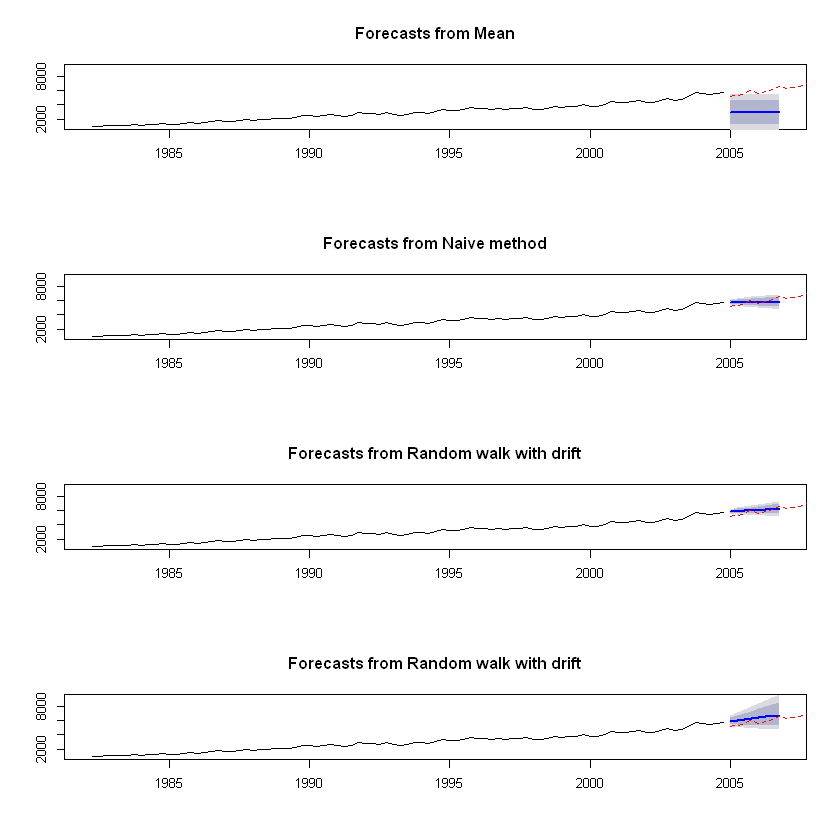

In [93]:
y.zakres=c(0.9,1.1)*range(cafe,cafe.test)
par(mfrow=c(4,1))
plot(f1_1,ylim=y.zakres)
lines(cafe.test,col="red",lty=2)
plot(f2_1,ylim=y.zakres)
lines(cafe.test,col="red",lty=2)
plot(f3_1,ylim=y.zakres)
lines(cafe.test,col="red",lty=2)
plot(f4_1,ylim=y.zakres)
lines(cafe.test,col="red",lty=2)

Wykresy prognoz potwierdzają
poprzednie spostrzeżenia dotyczące
przewagi metody z funkcją
rwf() w stosunku do pozostałych
metod.

### Accuracy dla podziału danych na zbiór uczący i testowy

In [94]:
kryteria=c("MAE","RMSE","MAPE","MASE")

In [95]:
accuracy(f1_1,cafe.test)[,kryteria]

,MAE,RMSE,MAPE,MASE
Training set,1052.997,1266.627,48.80257,4.608626
Test set,2862.916,2891.329,49.10080,12.530056


In [96]:
accuracy(f2_1,cafe.test)[,kryteria]

,MAE,RMSE,MAPE,MASE
Training set,146.6722,183.6694,5.204718,0.6419368
Test set,356.1625,404.3852,6.139538,1.5588078


In [97]:
accuracy(f3_1,cafe.test)[,kryteria]

,MAE,RMSE,MAPE,MASE
Training set,141.4256,175.8124,5.069347,0.6189738
Test set,329.9558,379.7879,5.896056,1.4441097


In [98]:
accuracy(f4_1,cafe.test)[,kryteria]

,MAE,RMSE,MAPE,MASE
Training set,141.0985,176.452,5.057414,0.6175423
Test set,528.8117,563.343,9.335455,2.3144375


Widzimy, że błędy na zbiorze testowym są wyraźnie
większe niż błędy na zbiorze uczącym.

Potwierdza to wcześniejsze
uwagi tego, że ocena dokładności prognoz wyłącznie na podstawie
danych uczących może prowadzić do zbyt optymistycznych wniosków. 

W szczególności, błędy wyznaczone na zbiorze testowym (w
przeciwieństwie do błędów prognoz na zbiorze uczącym) wskazują
jako dokładniejszą metodę uwzględniającą dryf (funkcja rwf())
bez zastosowania przekształcenia logarytmicznego.

#### Analiza własności reszt 

Policzmy je dla trzech prognoz szeregu czasowego cafe

#### Reszty dla prognozy metodą ruchomej średniej

In [99]:
reszty.1=residuals(f1_1)
print(reszty.1)

             Qtr1         Qtr2         Qtr3         Qtr4
1982              -1925.771429 -1927.071429 -1772.771429
1983 -1856.471429 -1880.271429 -1820.871429 -1715.271429
1984 -1775.271429 -1760.171429 -1742.271429 -1589.871429
1985 -1705.471429 -1666.171429 -1569.271429 -1375.871429
1986 -1501.471429 -1426.171429 -1336.871429 -1141.571429
1987 -1298.671429 -1273.471429 -1163.971429  -953.971429
1988 -1122.571429 -1061.071429  -963.871429  -824.071429
1989  -832.271429  -813.371429  -685.271429  -395.071429
1990  -476.771429  -526.471429  -483.571429  -308.771429
1991  -492.871429  -519.671429  -374.071429     2.028571
1992  -203.071429  -209.071429  -258.071429   -25.671429
1993  -313.271429  -397.171429  -284.871429    54.728571
1994   -37.671429  -123.671429   132.528571   381.328571
1995   217.828571   257.128571   391.228571   736.528571
1996   582.128571   485.028571   449.728571   563.428571
1997   448.628571   486.128571   553.028571   756.228571
1998   438.028571   400.128571 

#### Reszty dla prognozy metodą naiwną

In [100]:
reszty.2=residuals(f2_1)
print(reszty.2)

       Qtr1   Qtr2   Qtr3   Qtr4
1982            NA   -1.3  154.3
1983  -83.7  -23.8   59.4  105.6
1984  -60.0   15.1   17.9  152.4
1985 -115.6   39.3   96.9  193.4
1986 -125.6   75.3   89.3  195.3
1987 -157.1   25.2  109.5  210.0
1988 -168.6   61.5   97.2  139.8
1989   -8.2   18.9  128.1  290.2
1990  -81.7  -49.7   42.9  174.8
1991 -184.1  -26.8  145.6  376.1
1992 -205.1   -6.0  -49.0  232.4
1993 -287.6  -83.9  112.3  339.6
1994  -92.4  -86.0  256.2  248.8
1995 -163.5   39.3  134.1  345.3
1996 -154.4  -97.1  -35.3  113.7
1997 -114.8   37.5   66.9  203.2
1998 -318.2  -37.9  117.4  313.1
1999 -155.8  101.6   -1.3  373.9
2000 -259.3  -19.4  269.8  336.6
2001  -85.7  -45.0  134.2  163.6
2002 -292.0   76.4  206.8  288.5
2003 -246.1  184.3  345.9  618.5
2004 -231.3  -55.4  171.4  146.5


#### Reszty dla prognozy uzwględniającej dryft

In [101]:
reszty.3=residuals(f3_1)
print(reszty.3)

            Qtr1        Qtr2        Qtr3        Qtr4
1982                      NA  -54.445556  101.154444
1983 -136.845556  -76.945556    6.254444   52.454444
1984 -113.145556  -38.045556  -35.245556   99.254444
1985 -168.745556  -13.845556   43.754444  140.254444
1986 -178.745556   22.154444   36.154444  142.154444
1987 -210.245556  -27.945556   56.354444  156.854444
1988 -221.745556    8.354444   44.054444   86.654444
1989  -61.345556  -34.245556   74.954444  237.054444
1990 -134.845556 -102.845556  -10.245556  121.654444
1991 -237.245556  -79.945556   92.454444  322.954444
1992 -258.245556  -59.145556 -102.145556  179.254444
1993 -340.745556 -137.045556   59.154444  286.454444
1994 -145.545556 -139.145556  203.054444  195.654444
1995 -216.645556  -13.845556   80.954444  292.154444
1996 -207.545556 -150.245556  -88.445556   60.554444
1997 -167.945556  -15.645556   13.754444  150.054444
1998 -371.345556  -91.045556   64.254444  259.954444
1999 -208.945556   48.454444  -54.445556  320.

Narysujmy je na wykresach

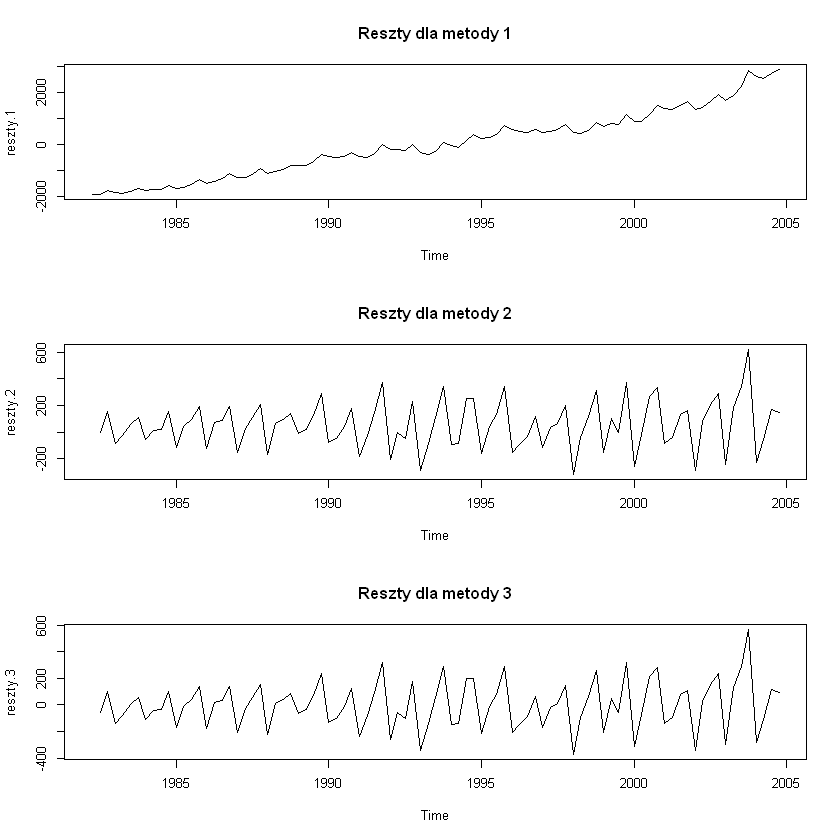

In [102]:
par(mfrow=c(3,1))
plot(reszty.1,main="Reszty dla metody 1")
plot(reszty.2,main="Reszty dla metody 2")
plot(reszty.3,main="Reszty dla metody 3")

Porównując wykresy reszt widzimy
wyraźnie pozostałość trendu
w przypadku pierwszej metody
(funkcja meanf()).

Reszty dla
dwóch pozostałych metod wyglądają
podobnie.

Narysujmy wykresy ACF i histogramy również dla tych trzech metod

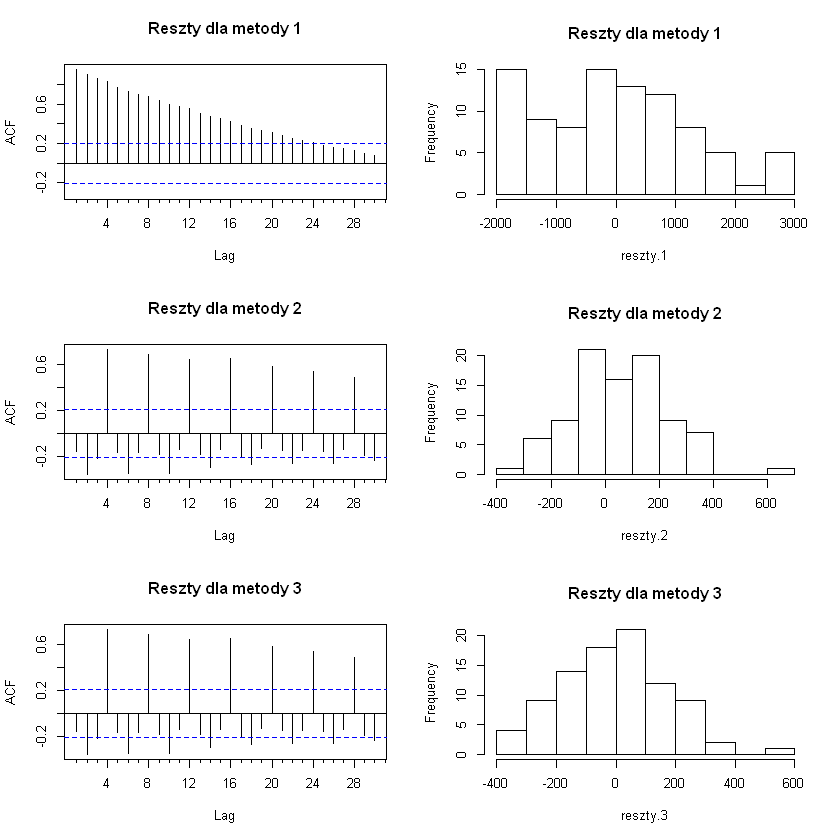

In [103]:
par(mfrow=c(3,2))
Acf(reszty.1,lag.max=30,main="Reszty dla metody 1")
hist(reszty.1,main="Reszty dla metody 1")
Acf(reszty.2,lag.max=30,main="Reszty dla metody 2")
hist(reszty.2,main="Reszty dla metody 2")
Acf(reszty.3,lag.max=30,main="Reszty dla metody 3")
hist(reszty.3,main="Reszty dla metody 3")

Analiza wykresów ACF oraz histogramów
potwierdza wcześniejsze
wnioski o nieadekwatności metody
pierwszej.

Na wykresie
histogramu dla metody drugiej
widać wyraźne przesunięcie rozkładu
reszt w kierunku wartości
dodatnich.

Porównując ACF reszt
dla metod drugiej i trzeciej, nie widzimy istotnych różnic w strukturze
zależności. 

Dla żadnej z metod nie możemy jednak uznać
szeregu reszt za biały szum.

#### Badanie losowości reszt testem Ljunga-Boxa

In [104]:
Box.test(reszty.1,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  reszty.1
X-squared = 588.2, df = 10, p-value < 2.2e-16


In [105]:
Box.test(reszty.2,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  reszty.2
X-squared = 149.18, df = 10, p-value < 2.2e-16


In [106]:
Box.test(reszty.3,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  reszty.3
X-squared = 149.18, df = 10, p-value < 2.2e-16


We wszystkich trzech przypadkach test odrzucił hipotezę o losowości
reszt (p-value < 0.05).

Uzyskane wyniki wykazują więc na pozostałości korelacji
czasowej w błędach prognozy.

Musimy zastosować bardziej zaawansowane metody prognozowania.

Skonstruujmy jeszcze raz model ARIMA, który otrzymaliśmy przy pomocy funkcji auto.arima()

In [107]:
ARIMA.model=Arima(cafe,order=c(0,1,0),seasonal=list(order=c(0,1,2),period=4))  

Sprognozujmy 8 kwartałów

In [108]:
ARIMA.model.prog=forecast(ARIMA.model,h=8)
ARIMA.model.prog

        Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
2011 Q1       7987.100 7826.295 8147.905 7741.170  8233.030
2011 Q2       8162.595 7935.183 8390.008 7814.798  8510.393
2011 Q3       8375.471 8096.949 8653.993 7949.508  8801.434
2011 Q4       8939.005 8617.395 9260.614 8447.145  9430.864
2012 Q1       8449.318 8087.139 8811.497 7895.413  9003.223
2012 Q2       8631.495 8232.855 9030.136 8021.827  9241.163
2012 Q3       9014.738 8582.702 9446.774 8353.996  9675.480
2012 Q4       9467.361 9004.332 9930.390 8759.219 10175.503

Widzimy tu po kolei: prognozy punktowe, przedziały predykcyjne
na poziomie ufności 0.80 oraz 0.95.

Możemy także osobno wyświetlić:

Prognozy punktowe

In [109]:
print(ARIMA.model.prog$mean)

         Qtr1     Qtr2     Qtr3     Qtr4
2011 7987.100 8162.595 8375.471 8939.005
2012 8449.318 8631.495 9014.738 9467.361


Dolne
i górne końce przedziałów predykcyjnych

In [110]:
print(ARIMA.model.prog$lower)

             80%      95%
2011 Q1 7826.295 7741.170
2011 Q2 7935.183 7814.798
2011 Q3 8096.949 7949.508
2011 Q4 8617.395 8447.145
2012 Q1 8087.139 7895.413
2012 Q2 8232.855 8021.827
2012 Q3 8582.702 8353.996
2012 Q4 9004.332 8759.219


In [111]:
print(ARIMA.model.prog$upper)

             80%       95%
2011 Q1 8147.905  8233.030
2011 Q2 8390.008  8510.393
2011 Q3 8653.993  8801.434
2011 Q4 9260.614  9430.864
2012 Q1 8811.497  9003.223
2012 Q2 9030.136  9241.163
2012 Q3 9446.774  9675.480
2012 Q4 9930.390 10175.503


Dopasowany model

In [112]:
print(ARIMA.model.prog$model)

Series: cafe 
ARIMA(0,1,0)(0,1,2)[4] 

Coefficients:
         sma1    sma2
      -0.9642  0.3096
s.e.   0.1139  0.1052

sigma^2 estimated as 15744:  log likelihood=-688.57
AIC=1383.14   AICc=1383.37   BIC=1391.25


Wartości dopasowane

In [113]:
print(ARIMA.model.prog$fitted)

         Qtr1     Qtr2     Qtr3     Qtr4
1982          1012.615 1011.639 1165.899
1983 1082.767 1060.848 1075.453 1257.920
1984 1147.052 1151.473 1199.989 1334.328
1985 1270.188 1229.264 1304.873 1502.086
1986 1485.117 1442.766 1546.177 1740.702
1987 1707.469 1659.846 1720.330 1933.930
1988 1878.425 1857.265 1951.922 2153.320
1989 1985.433 2150.038 2217.382 2446.365
1990 2399.600 2511.030 2512.754 2639.664
1991 2525.678 2483.830 2528.747 2779.025
1992 2853.009 2740.817 2822.881 2897.887
1993 2796.482 2610.247 2640.898 2921.791
1994 2834.514 2880.019 2870.907 3346.536
1995 3110.621 3112.010 3262.969 3626.563
1996 3488.152 3459.278 3555.385 3678.690
1997 3330.530 3350.554 3571.342 3790.838
1998 3535.573 3331.696 3430.891 3697.331
1999 3621.973 3591.844 3783.540 3927.902
2000 3890.980 3813.455 3882.886 4321.005
2001 4213.922 4352.865 4344.102 4714.065
2002 4365.889 4309.951 4489.744 4893.492
2003 4678.846 4616.585 4949.511 5424.338
2004 5555.962 5558.296 5660.348 5930.129
2005 5567.034 53

Wartości resztowe

In [114]:
print(ARIMA.model.prog$residuals)

             Qtr1         Qtr2         Qtr3         Qtr4
1982                 0.5849711    0.2605998    0.3010095
1983   -0.2667800   -2.1477385   42.6472677  -34.2201136
1984   16.6484924   27.3268342   -3.2886535   14.7717980
1985  -36.6876564   43.5361731   64.8271507   61.0140763
1986  -47.6172595   70.0342311   55.9228451   56.6978572
1987  -67.1686575    5.6538581   54.6697508   51.0700948
1988  -62.0246000   20.6345225   23.1780370  -38.4202208
1989  121.2671227  -24.4375358   36.3184090   97.5352677
1990   62.6003795  -98.5300011  -57.3536159   -9.4641717
1991  -79.5778671  -64.5295110   36.1533101  161.9748697
1992 -117.1091431  -10.9172689 -141.9812994   15.4129794
1993 -170.7820747  -68.4471601   13.2018230   71.9086443
1994   66.7864349  -64.7189935  200.5928805  -26.2355230
1995   46.1790644   84.0895958   67.2311302   48.9368037
1996   32.9476468  -35.2780145 -166.6852743 -176.2897089
1997   57.0703397   74.5459636  -79.3416342  -95.6378877
1998 -158.5726637    7.4035073 

Porównajmy wyniki na wykresie.

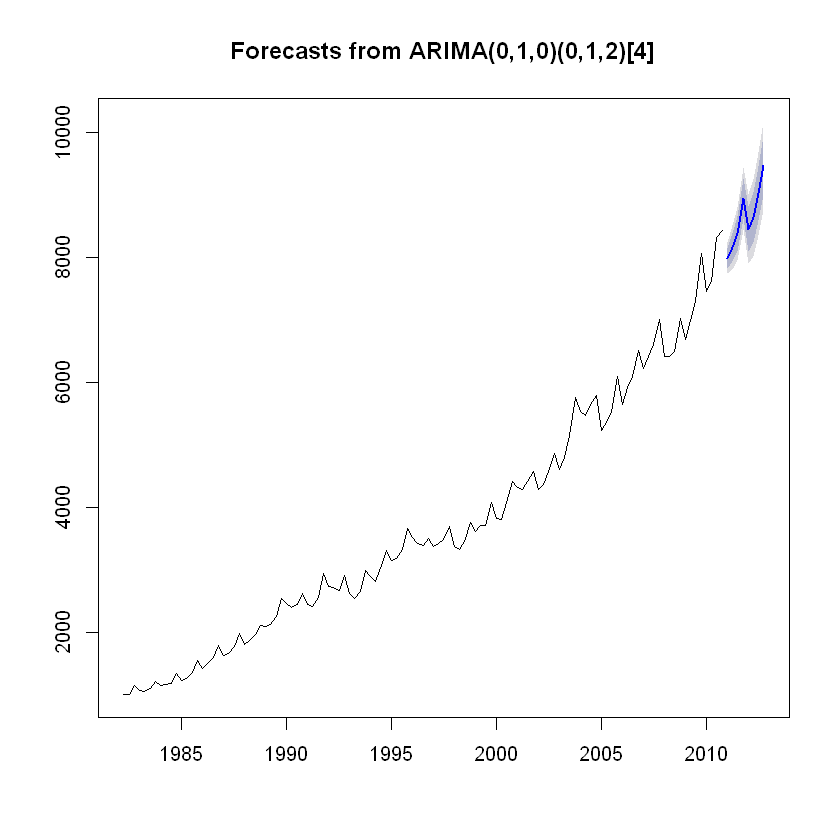

In [115]:
plot(ARIMA.model.prog)

Patrząc na wykres widzimy, że prognozy znajdują się w węższym przedziale ufności niż w przypadku poprzednich prognoz. 

Zatem możemy przypuszczać, że ta prognoza jest lepsza.

Sprawdźmy jeszcze jakość.

In [116]:
kryteria=c("MAE","RMSE","MAPE","MASE")
accuracy(ARIMA.model.prog)[,kryteria]

MAE        RMSE        MAPE        MASE 
 86.8055300 121.5978445   2.3434760   0.3158562

Prognozy okazały się bardzo dobre. MAE i RMSE mają niskie wartości.

#### Automatyzacja konstrukcji prognoz

Narysujmy jeszcze raz wykres szeregu czasowego.

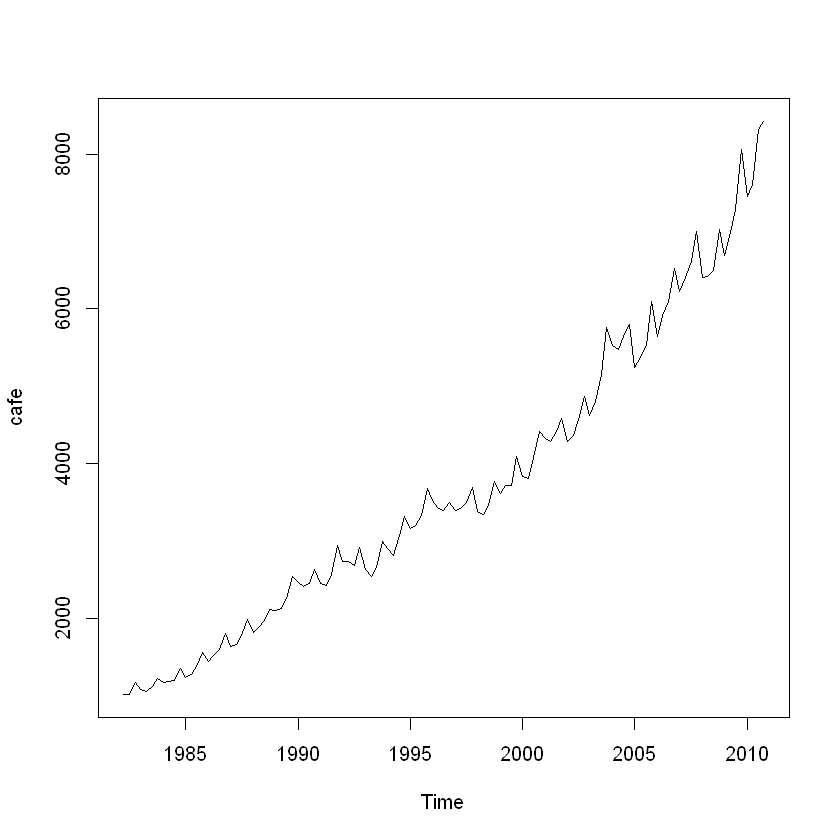

In [117]:
plot(cafe)

Zastosujmy przekształcenie logarytmiczne dla szeregu cafe.

In [118]:
cafe.ARIMA=auto.arima(cafe,lambda=0)

In [119]:
cafe.ARIMA

Series: cafe 
ARIMA(1,0,0)(0,1,1)[4] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     sma1   drift
      0.9489  -0.8224  0.0178
s.e.  0.0331   0.0676  0.0023

sigma^2 estimated as 0.0008152:  log likelihood=236.55
AIC=-465.09   AICc=-464.72   BIC=-454.26

Otrzymaliśmy model ARIMA(1,0,0) x (0,1,1)_4.

Wyznaczmy prognozy.

In [120]:
cafe.prog=forecast(cafe.ARIMA,h=8,fan=TRUE)
cafe.prog

        Point Forecast    Lo 51     Hi 51    Lo 54     Hi 54    Lo 57     Hi 57
2011 Q1       7910.442 7756.054  8067.903 7745.313  8079.091 7734.187  8090.713
2011 Q2       8085.748 7869.007  8308.459 7853.988  8324.348 7838.440  8340.860
2011 Q3       8460.492 8190.328  8739.568 8171.659  8759.534 8152.341  8780.291
2011 Q4       9052.592 8727.585  9389.702 8705.176  9413.873 8681.994  9439.008
2012 Q1       8497.984 8153.120  8857.435 8129.404  8883.275 8104.879  8910.155
2012 Q2       8686.111 8300.868  9089.233 8274.432  9118.272 8247.101  9148.490
2012 Q3       9088.481 8657.012  9541.454 8627.456  9574.141 8596.907  9608.163
2012 Q4       9724.328 9237.059 10237.300 9203.731 10274.371 9169.289 10312.964
           Lo 60     Hi 60    Lo 63     Hi 63    Lo 66     Hi 66    Lo 69
2011 Q1 7722.618  8102.834 7710.532  8115.534 7697.842  8128.913 7684.434
2011 Q2 7822.280  8358.090 7805.410  8376.155 7787.705  8395.197 7769.012
2011 Q3 8132.271  8801.960 8111.327  8824.688 8089.357  88

Spójrzmy na wykres.

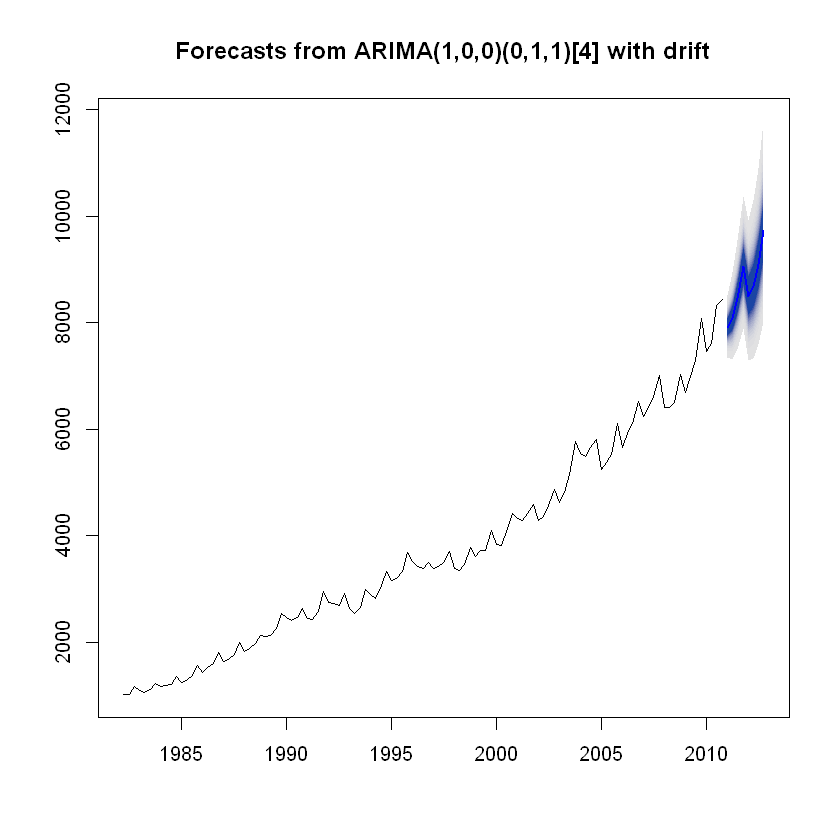

In [121]:
plot(cafe.prog)

Na rysunkach widzimy otrzymane prognozy punktowe oraz wykresy
wachlarzowe.

Widoczny jest wzrost wariancji w przypadku szeregu cafe.

Dalsza analiza skuteczności prognoz mogłaby obejmować zastosowanie
kryteriów dokładności prognoz oraz wykorzystanie podziału
danych na zbiór uczący i zbiór testowy.

Mimo automatycznego dopasowania modeli, warto też zrobić badania
diagnostyczne pod kątem poprawności dopasowania, m. in.
analizę własności reszt.

#### Badanie jakości prognoz.

In [122]:
accuracy(cafe.prog)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-5.884838,119.4156,83.37906,0.001041961,2.206674,0.3033884,-0.005893911


Wartości RMSE i MAE są najniższe i zarazem najlepsze do tej pory.

#### Prognoza w podziale na zbiór uczący i testowy

In [123]:
cafe.ARIMA.train=auto.arima(cafe.train,lambda=0)
cafe.ARIMA.train

Series: cafe.train 
ARIMA(1,0,0)(0,1,1)[4] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     sma1   drift
      0.9525  -0.8140  0.0185
s.e.  0.0349   0.0793  0.0029

sigma^2 estimated as 0.0008476:  log likelihood=183.62
AIC=-359.24   AICc=-358.76   BIC=-349.38

In [124]:
cafe.prog.train=forecast(cafe.ARIMA.train,h=8,fan=TRUE)
cafe.prog.train

        Point Forecast    Lo 51    Hi 51    Lo 54    Hi 54    Lo 57    Hi 57
2005 Q1       5521.113 5411.257 5633.199 5403.616 5641.165 5395.701 5649.440
2005 Q2       5561.810 5409.560 5718.345 5399.013 5729.516 5388.095 5741.126
2005 Q3       5802.044 5612.527 5997.961 5599.436 6011.983 5585.891 6026.561
2005 Q4       6237.563 6008.127 6475.760 5992.316 6492.846 5975.960 6510.617
2006 Q1       5941.565 5693.701 6200.220 5676.667 6218.824 5659.053 6238.181
2006 Q2       5985.496 5711.907 6272.188 5693.148 6292.856 5673.755 6314.365
2006 Q3       6244.163 5938.004 6566.107 5917.050 6589.359 5895.395 6613.564
2006 Q4       6713.004 6364.944 7080.098 6341.161 7106.652 6316.586 7134.301
           Lo 60    Hi 60    Lo 63    Hi 63    Lo 66    Hi 66    Lo 69    Hi 69
2005 Q1 5387.471 5658.070 5378.874 5667.113 5369.847 5676.640 5360.310 5686.740
2005 Q2 5376.748 5753.242 5364.903 5765.944 5352.473 5779.335 5339.349 5793.540
2005 Q3 5571.820 6041.781 5557.136 6057.745 5541.734 6074.581 5525.

#### Jakość po podziale

In [125]:
accuracy(cafe.prog.train,cafe.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.028967,91.62746,67.25196,0.0001390234,2.23162,0.2943400,0.1881200,NA
Test set,-198.957145,212.43103,198.95715,-3.4960704117,3.49607,0.8707709,-0.3390363,0.5857525


Widać, że wyniki na zbiorze uczącym są nieco lepsze niż na zbiorze testowym. 

Wyniki RMSE i MAE są najniższe, a zarazem prognoza jest najlepsza.

#### Analiza właśności reszt

In [126]:
reszty=residuals(cafe.ARIMA)
print(reszty)

              Qtr1          Qtr2          Qtr3          Qtr4
1982                0.0069030585  0.0068839584  0.0070080688
1983  0.0069157870 -0.0147144668  0.0395151007 -0.0418145398
1984  0.0129602869  0.0252239133 -0.0097109532  0.0041249201
1985 -0.0244450994  0.0305320051  0.0491836640  0.0194730881
1986 -0.0045782432  0.0469446393  0.0281526177  0.0041268324
1987 -0.0055612759  0.0045315314  0.0294422523  0.0019729572
1988  0.0001657645  0.0232275144  0.0130930855 -0.0391527362
1989  0.0836119014 -0.0011072049  0.0214767895  0.0245117579
1990  0.0448241230 -0.0251566656 -0.0202599594 -0.0314330965
1991 -0.0055739319 -0.0152635081  0.0205308131  0.0407734692
1992 -0.0021098316 -0.0014281469 -0.0569862447 -0.0217050601
1993 -0.0375358509 -0.0373007033  0.0071803303  0.0151925859
1994  0.0394512932 -0.0266405632  0.0513045318 -0.0261424999
1995  0.0148722658  0.0212705350 -0.0010015536 -0.0001900445
1996  0.0213510500 -0.0208935528 -0.0523777382 -0.0685396308
1997  0.0209713507  0.01

Narysujmy sobie wykres.

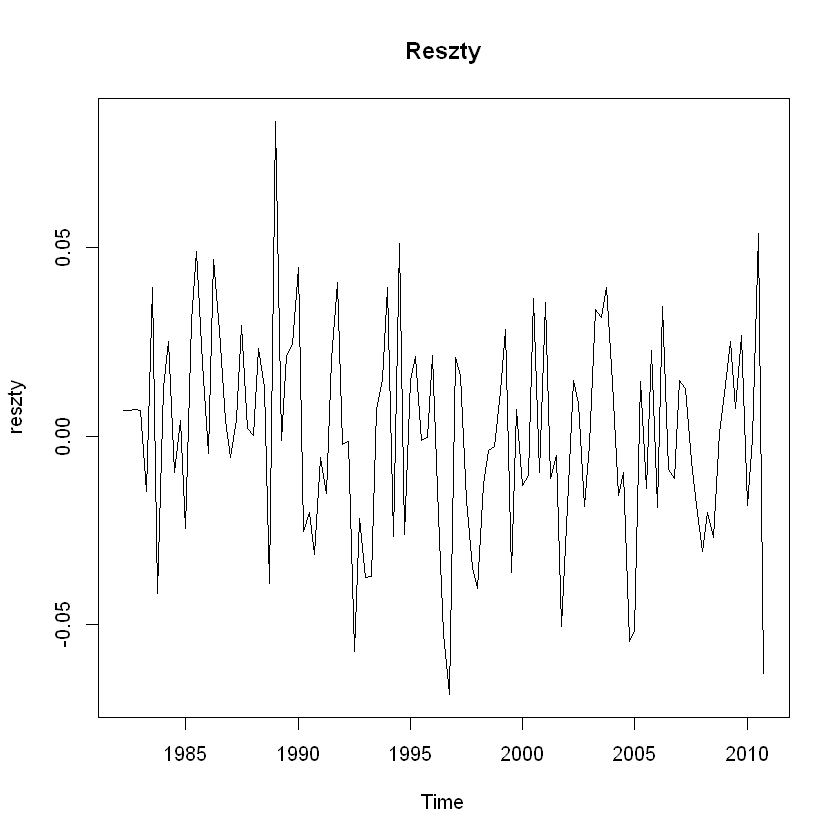

In [127]:
plot(reszty,main="Reszty")

Wykres reszt wygląda na losowy.

Sprawdźmy jeszcze ACF i narysujmy histogram.

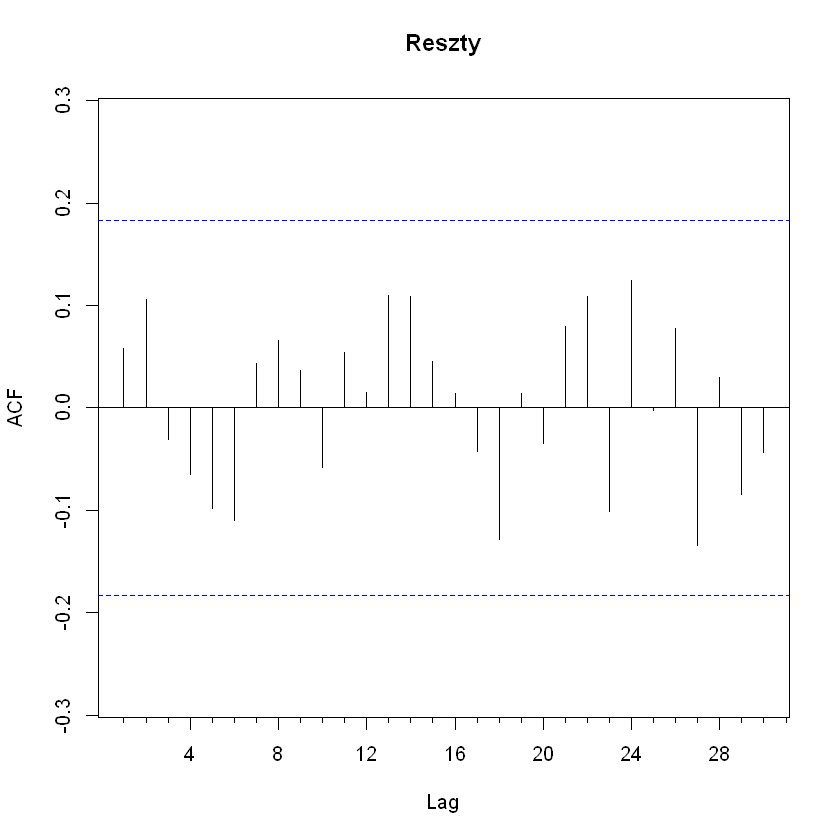

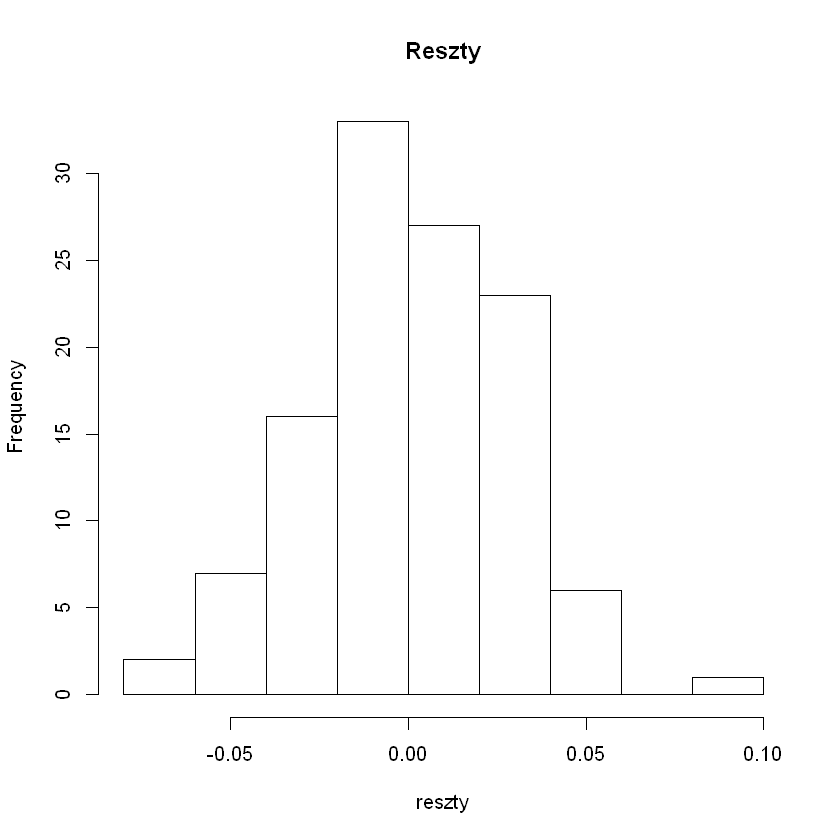

In [128]:
Acf(reszty,lag.max=30,main="Reszty")
hist(reszty,main="Reszty")

Szereg reszt możemy uznać za biały szum.

#### Badanie losowości reszt testem Ljunga-Boxa

In [129]:
Box.test(reszty,lag=10,type="Ljung-Box")


	Box-Ljung test

data:  reszty
X-squared = 6.4387, df = 10, p-value = 0.7772


P-value > 0.05 zatem nie mamy podstaw do odrzucenia hipotezy zerowej o losowości reszt. 

Reszty w szeregu są losowe.

## Prognozy oparte na dekompozycji

Zbudowane zostały wcześniej modele dekompozycji, a teraz przyszedł czas na prognozowanie. 

In [130]:
cafe.tlsm.trend=tslm(cafe∼trend)
cafe.tlsm.trend.sez=tslm(cafe∼trend+season)

Dla każdego sposród modeli zbudujemy progozę i zbadamy jej jakość za pomocą znanej metody accuracy().

In [131]:
cafe.tlsm.trend.prog=forecast(cafe.tlsm.trend,h=8)
cafe.tlsm.trend.prog

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011 Q1       6998.117 6432.887 7563.347 6129.423 7866.811
2011 Q2       7054.709 6489.226 7620.191 6185.628 7923.790
2011 Q3       7111.301 6545.562 7677.039 6241.826 7980.775
2011 Q4       7167.892 6601.894 7733.891 6298.017 8037.767
2012 Q1       7224.484 6658.221 7790.747 6354.203 8094.766
2012 Q2       7281.076 6714.544 7847.608 6410.381 8151.770
2012 Q3       7337.668 6770.863 7904.473 6466.554 8208.782
2012 Q4       7394.259 6827.178 7961.341 6522.720 8265.799

In [132]:
cafe.tlsm.trend.sez.prog=forecast(cafe.tlsm.trend.sez,h=8)
cafe.tlsm.trend.sez.prog

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011 Q1       6884.281 6333.221 7435.340 6037.252 7731.310
2011 Q2       6948.804 6397.581 7500.028 6101.523 7796.085
2011 Q3       7092.235 6541.012 7643.459 6244.954 7939.516
2011 Q4       7385.304 6834.081 7936.528 6538.023 8232.585
2012 Q1       7110.352 6558.310 7662.393 6261.813 7958.890
2012 Q2       7174.875 6622.638 7727.113 6326.035 8023.715
2012 Q3       7318.306 6766.069 7870.544 6469.466 8167.146
2012 Q4       7611.375 7059.138 8163.613 6762.535 8460.215

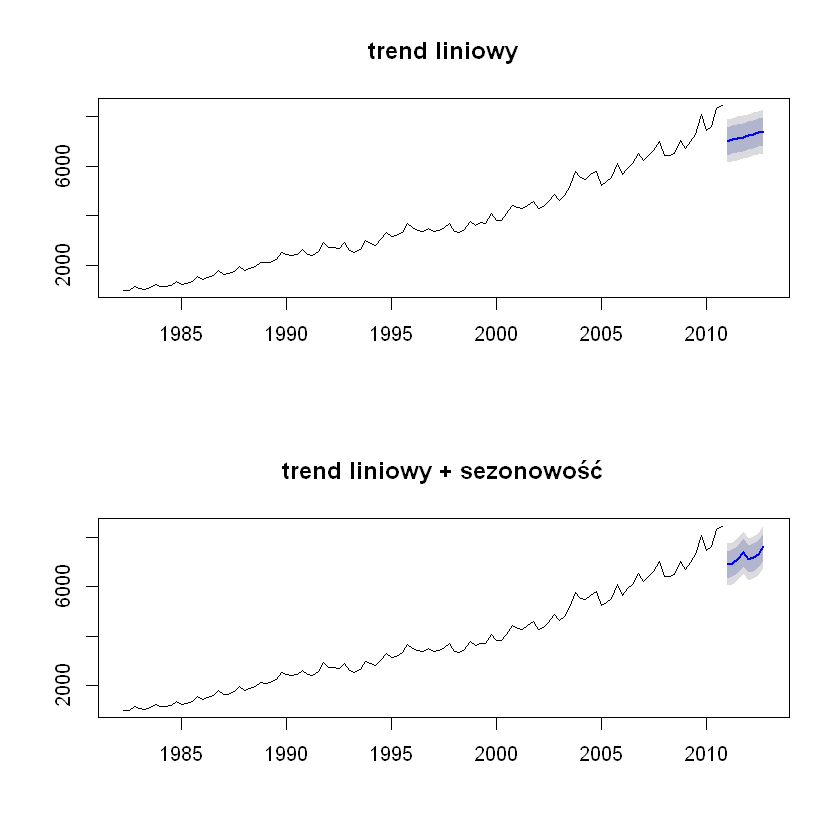

In [133]:
par(mfrow=c(2,1))
plot(cafe.tlsm.trend.prog,main="trend liniowy")
plot(cafe.tlsm.trend.sez.prog,main="trend liniowy + sezonowość")

Widzimy, że prognozy nie są najlepsze.

Sprawdźmy dokładność prognoz patrząc na m.in. MAE oraz RMSE.

In [134]:
kryteria=c("MAE","RMSE","MAPE","MASE")

In [135]:
accuracy(cafe.tlsm.trend.prog)[,kryteria]

MAE       RMSE       MAPE       MASE 
327.462371 427.181503  10.551825   1.191526

In [136]:
accuracy(cafe.tlsm.trend.sez.prog)[,kryteria]

MAE       RMSE       MAPE       MASE 
316.070354 405.579378  10.385635   1.150074

Zarówno dla modelu z samym trendem, jak i dla modelu z trendem i współczynnikiem sezonowym wyniki nie są najlepsze. 

MAE i RMSE mają wysokie wartości. 

Wcześniejsze prognozy były zdecydowanie lepsze.

Aby poprawić jakość dopasowania modelu dekompozycji do szeregu
czasowego cafe, rozważymy teraz dwa nieco bardziej skomplikowane
modele trendu: kwadratowy oraz sześcienny, oczywiście każdy
ze współczynnikiem sezonowym.

In [138]:
cafe.tslm3=tslm(cafe∼trend+I(trendˆ2)+season)

In [139]:
summary(cafe.tslm3)


Call:
tslm(formula = cafe ~ trend + I(trend^2) + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.16 -194.17  -16.09  174.98  774.99 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1105.74914   80.45637  13.743  < 2e-16 ***
trend         17.64128    2.74347   6.430 3.47e-09 ***
I(trend^2)     0.33514    0.02291  14.627  < 2e-16 ***
season2      -17.80025   64.15131  -0.277    0.782    
season3       69.44816   64.14708   1.083    0.281    
season4      305.66421   64.15131   4.765 5.87e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 242 on 109 degrees of freedom
Multiple R-squared:  0.985,	Adjusted R-squared:  0.9844 
F-statistic:  1436 on 5 and 109 DF,  p-value: < 2.2e-16


Model jest bardzo dobry R^2 wynosi 98%

Współczynniki poza season2 oraz season3 są istotne statystycznie.

In [140]:
cafe.tslm4=tslm(cafe∼poly(trend,3,raw=TRUE)+season)

In [141]:
summary(cafe.tslm4)


Call:
tslm(formula = cafe ~ poly(trend, 3, raw = TRUE) + season)

Residuals:
   Min     1Q Median     3Q    Max 
-396.1 -126.1  -27.0  112.5  474.6 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.588e+02  7.529e+01   8.751 3.16e-14 ***
poly(trend, 3, raw = TRUE)1  6.288e+01  5.114e+00  12.296  < 2e-16 ***
poly(trend, 3, raw = TRUE)2 -6.355e-01  1.022e-01  -6.219 9.65e-09 ***
poly(trend, 3, raw = TRUE)3  5.579e-03  5.792e-04   9.631 3.22e-16 ***
season2                     -1.011e+01  4.728e+01  -0.214    0.831    
season3                      6.945e+01  4.727e+01   1.469    0.145    
season4                      2.980e+02  4.728e+01   6.303 6.51e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 178.3 on 108 degrees of freedom
Multiple R-squared:  0.992,	Adjusted R-squared:  0.9915 
F-statistic:  2219 on 6 and 108 DF,  p-value: < 2.2e-16


Model sześcienny jest jeszcze lepszy niż model stopnia 2-ego.

R^2 wynosi 99% i jest najwyższe spośród wszystkich do tej pory.

Ponownie poza współczynnikami season2 oraz season3 wszystkie inne współczynniki są istotne statystycznie.

Spójrzmy jak to będzie obrazowało się na wykresie.

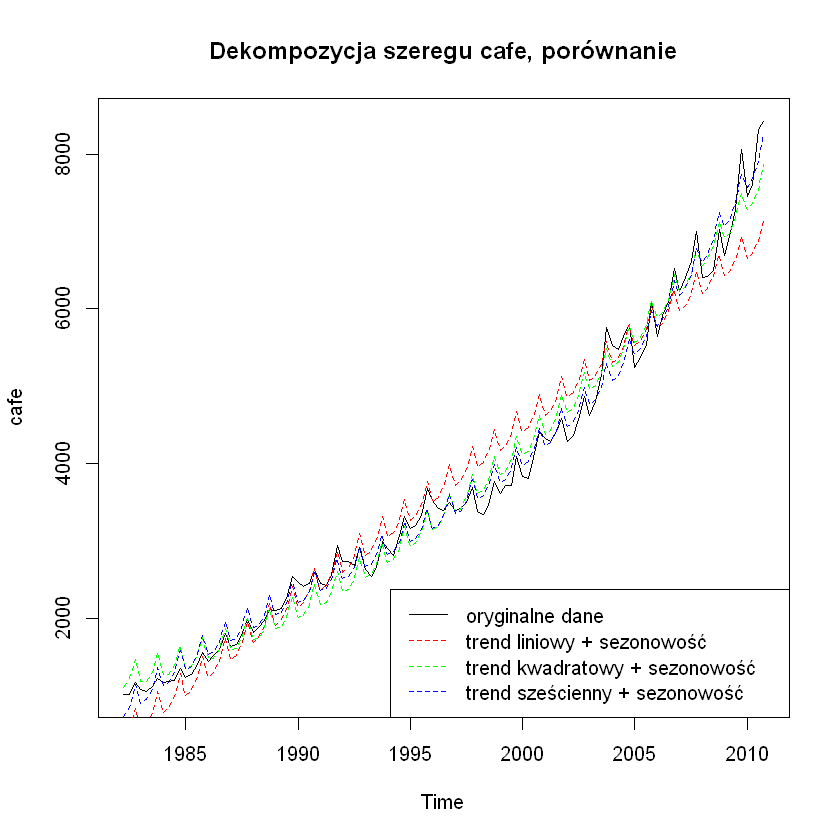

In [142]:
plot(cafe,main="Dekompozycja szeregu cafe, porównanie")
lines(fitted(cafe.tlsm.trend.sez),lty=2,col="red")
lines(fitted(cafe.tslm3),lty=2,col="green")
lines(fitted(cafe.tslm4),lty=2,col="blue")
legend("bottomright",legend=c("oryginalne dane","trend liniowy + sezonowość","trend kwadratowy + sezonowość","trend sześcienny + sezonowość"),col=c("black","red","green","blue"),lty=c(1,2,2,2))

Analizując wykres oraz wyniki
wyraźnie dostrzegamy poprawę
jakości dopasowania wraz ze
wzrostem stopnia wielomianu dla
modelu trendu.

W szczególności,
rośnie wartość współczynnika
R^2. 

Najlepsze dopasowanie
otrzymujemy zatem dla modelu
sześciennego.

Spójrzmy jeszcze na wykresy reszt.

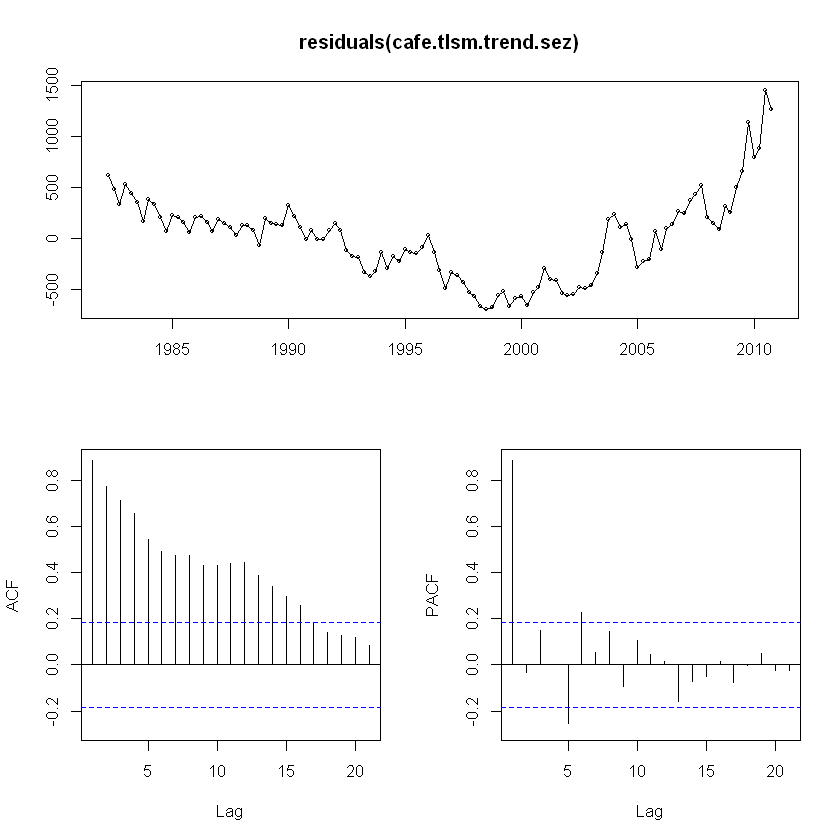

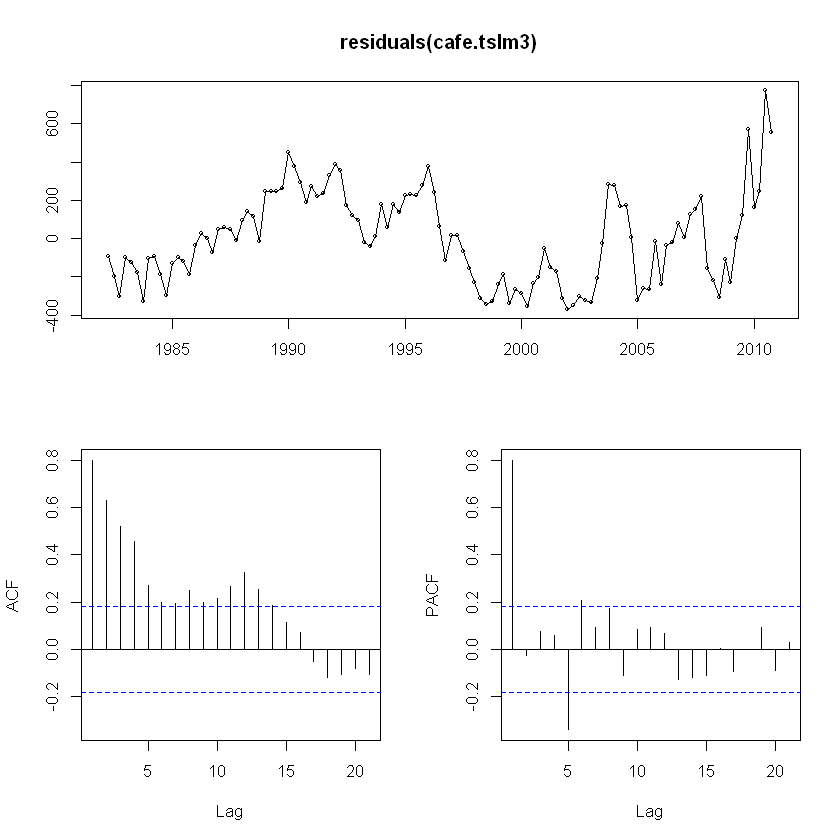

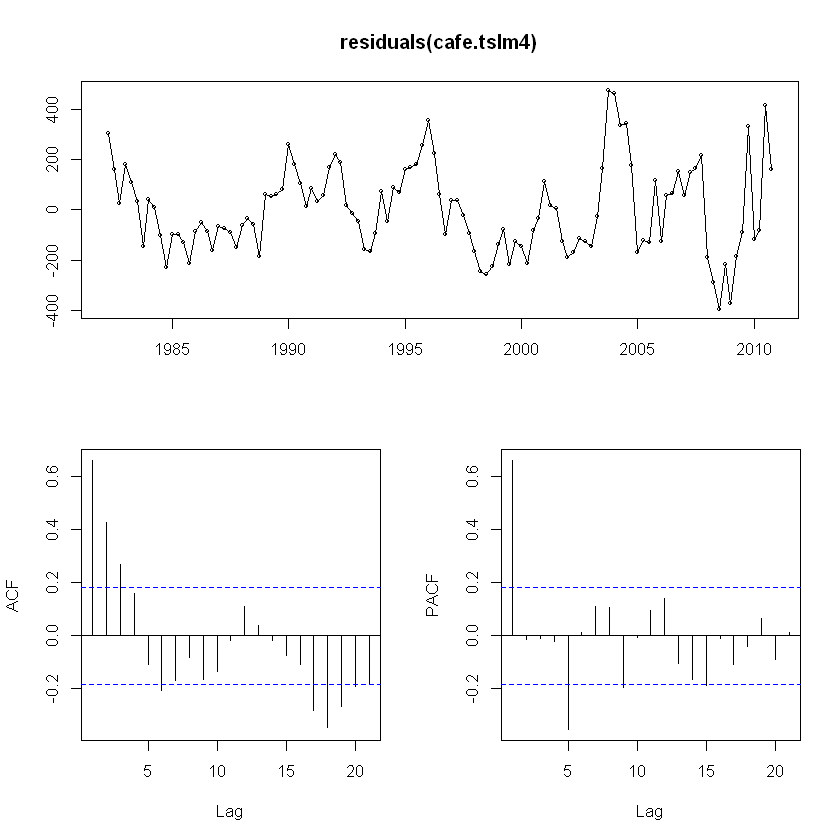

In [143]:
tsdisplay(residuals(cafe.tlsm.trend.sez))
tsdisplay(residuals(cafe.tslm3))
tsdisplay(residuals(cafe.tslm4))

Reszty dla modelu z trendem sześciennym są najbliższe spełnienia
założenia o stacjonarności. 

Świadczy o tym szybsze zanikanie ACF.

Teraz możemy już przejść do prognozy dla tych dwóch modeli.

In [144]:
cafe.tslm3.prog=forecast(cafe.tslm3,h=8)
cafe.tslm3.prog

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011 Q1       7661.811 7332.963 7990.659 7156.317 8167.304
2011 Q2       7739.740 7410.550 8068.930 7233.721 8245.758
2011 Q3       7923.388 7593.429 8253.347 7416.187 8430.589
2011 Q4       8256.674 7925.910 8587.438 7748.235 8765.113
2012 Q1       8048.750 7716.102 8381.398 7537.415 8560.085
2012 Q2       8129.360 7796.246 8462.475 7617.309 8641.412
2012 Q3       8315.690 7981.600 8649.779 7802.139 8829.240
2012 Q4       8651.657 8316.552 8986.762 8136.546 9166.768

In [145]:
cafe.tslm4.prog=forecast(cafe.tslm4,h=8)
cafe.tslm4.prog

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011 Q1       8108.720 7859.116 8358.324 7725.020 8492.420
2011 Q2       8240.552 7988.878 8492.226 7853.670 8627.434
2011 Q3       8464.701 8210.985 8718.416 8074.680 8854.722
2011 Q4       8840.496 8584.531 9096.460 8447.018 9233.974
2012 Q1       8692.500 8432.663 8952.337 8293.069 9091.931
2012 Q2       8835.113 8572.085 9098.141 8430.777 9239.449
2012 Q3       9070.177 8804.071 9336.284 8661.109 9479.246
2012 Q4       9457.021 9187.570 9726.472 9042.811 9871.231

Porównajmy prognozy oraz przedziały predykcyjne dla
trzech modeli ze współrzędną sezonową.

Warning message in plot.window(xlim, ylim, log, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in axis(1, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in axis(2, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in box(...):
"'y.lim' nie jest parametrem graficznym"Warning message in plot.window(xlim, ylim, log, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in axis(1, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in axis(2, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in box(...):
"'y.lim' nie jest parametrem graficznym"Warning message in plot.window(xlim, ylim, log, ...):
"'y.lim' nie jest parametrem graficznym"Warning message in title(main = main, xlab = xlab, ylab = ylab, ...)

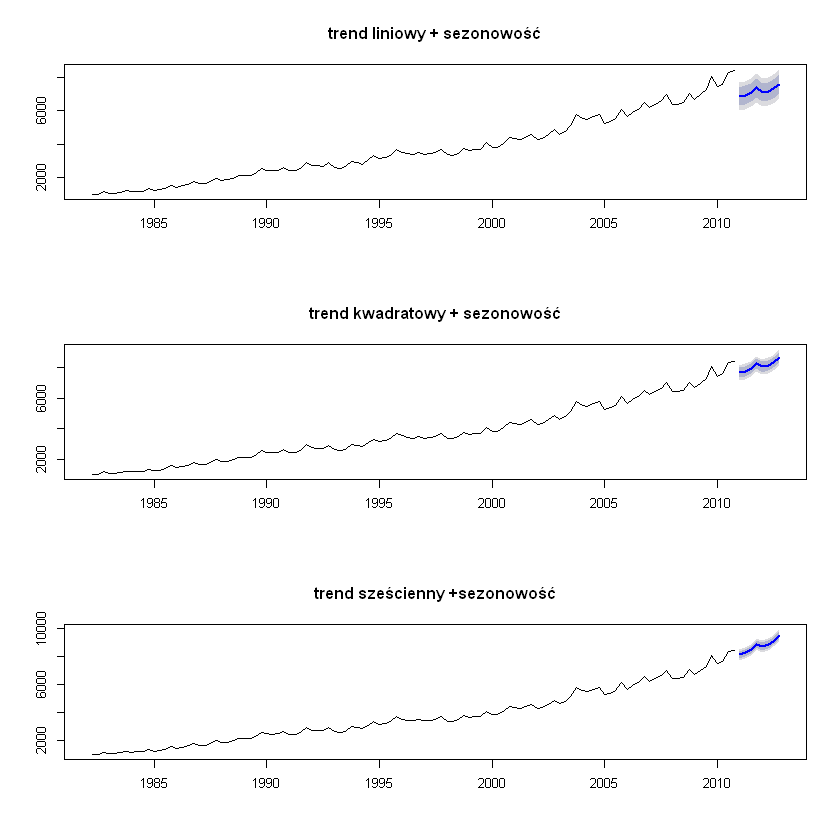

In [146]:
par(mfrow=c(3,1))
y.range=c(40000,80000)
plot(cafe.tlsm.trend.sez.prog,main="trend liniowy + sezonowość",y.lim=y.range)
plot(cafe.tslm3.prog,main="trend kwadratowy + sezonowość",y.lim=y.range)
plot(cafe.tslm4.prog,main="trend sześcienny +sezonowość",y.lim=y.range)

Na wykresach można zauważyć wyraźne, jakościowe
różnice w skonstruowanych prognozach. 

W przypadku modelu
liniowego widoczny jest gwałtowny trend wzrostowy w prognozach, w przypadku modelu
kwadratowego - trend jest mniej gwałtowny, a w przypadku modelu
sześciennego prognozy mają już
ustabilizowaną tendencję rosnącą.


Sprawdźmy teraz jakość prognoz.

In [147]:
accuracy(cafe.tslm3.prog)[,kryteria]

MAE        RMSE        MAPE        MASE 
194.6620004 235.6252077   6.4980946   0.7083097

In [148]:
accuracy(cafe.tslm4.prog)[,kryteria]

MAE        RMSE        MAPE        MASE 
141.7046718 172.8224346   4.6493096   0.5156157

Wyniki dla bardziej złożonych modeli są lepsze.

Można wysnuć wniosek, że im bardziej złożony model
trendu, tym prowadzi on do dokładniejszych prognoz.